In [1]:
## IT'S DANGEROUS TO GO ALONE! TAKE THIS:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Soil, (initial) Exploratory Data Analysis
---
**Let the Soil Play it's Simple Part**
Greg Sakowski
* Book 5 of 7
* Additional formatting to include Latitude and Longitude (numeric state+county) and adding Day (numeric date with Year and Month). Exploratory graphing for the numeric columns, additional graphing and analysis for the three types/sources of data. 
* Reading from CSV: soilRough.csv, roughFIPSandClimDiv_df.csv,
* Writing to CSV: soilFull.csv, soil.csv,

---
## Table of Contents:

[Data Munging](#Data-Munging)

[Data-Distribution](#Data-Distribution)

[Correlation](#Correlation)

[Graphing Relationships and Rates ](#Graphing-Relationships-and-Rates)

   * [Drought](#Drought)
   * [Agriculture](#Agriculture)
   * [Weather](#Weather)

[Combining Agricultural Expenses](#Combining-Agricultural-Expenses)


We have successfully merged our three clean datasets for our 15 "Farmland" states and are ready to perform some basic formatting followed by analysis. We will be examining the data in three ways:

* Distribution of each variable
* Correlation between each variable
* Specific relationships between variables

First, calling in our data and a bit of house cleaning to get it in the format we need.

In [2]:
soil = pd.read_csv('data/soilRough.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
soil

,Date,FIPS_x,County_x,State_x,Sq_Mi_No_Drought,Sq_Mi_Abnormally_Dry,Sq_Mi_Moderate_Drought,Sq_Mi_Severe_Drought,Sq_Mi_Extreme_Drought,Sq_Mi_Exceptional_Drought,FIPSYearMonth,total_Sq_Mi,in_drought,Year_x,Month,precip,mintemp,maxtemp,avgtemp,FIPSYear,Program,Year_y,State_y,County_y,FIPS_y,Chem_expense_dollars,Chem_operations,Acres_operated,Operations,Fert_expense_dollars,Fert_operations
0,2017-12-26,5007,Benton County,AR,0.00,222.84,651.13,0.00,0.0,0.0,5007201712,873.97,1,2017,12,1.92,28.8,48.9,38.9,50072017,CENSUS,2017,ARKANSAS,BENTON,5007,1072000.0,702.0,243753.0,1936,2967000.0,798.0
1,2017-12-19,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,5007201712,873.97,1,2017,12,1.92,28.8,48.9,38.9,50072017,CENSUS,2017,ARKANSAS,BENTON,5007,1072000.0,702.0,243753.0,1936,2967000.0,798.0
2,2017-12-12,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,5007201712,873.97,1,2017,12,1.92,28.8,48.9,38.9,50072017,CENSUS,2017,ARKANSAS,BENTON,5007,1072000.0,702.0,243753.0,1936,2967000.0,798.0
3,2017-12-05,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,5007201712,873.97,1,2017,12,1.92,28.8,48.9,38.9,50072017,CENSUS,2017,ARKANSAS,BENTON,5007,1072000.0,702.0,243753.0,1936,2967000.0,798.0
4,2017-11-28,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,5007201711,873.97,1,2017,11,1.58,40.7,62.7,51.7,50072017,CENSUS,2017,ARKANSAS,BENTON,5007,1072000.0,702.0,243753.0,1936,2967000.0,798.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307016,2002-01-29,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,53029200201,213.97,0,2002,1,3.90,36.6,45.6,41.1,530292002,CENSUS,2002,WASHINGTON,ISLAND,53029,85000.0,70.0,15018.0,348,135000.0,72.0
307017,2002-01-22,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,53029200201,213.97,0,2002,1,3.90,36.6,45.6,41.1,530292002,CENSUS,2002,WASHINGTON,ISLAND,53029,85000.0,70.0,15018.0,348,135000.0,72.0
307018,2002-01-15,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,53029200201,213.97,0,2002,1,3.90,36.6,45.6,41.1,530292002,CENSUS,2002,WASHINGTON,ISLAND,53029,85000.0,70.0,15018.0,348,135000.0,72.0
307019,2002-01-08,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,53029200201,213.97,0,2002,1,3.90,36.6,45.6,41.1,530292002,CENSUS,2002,WASHINGTON,ISLAND,53029,85000.0,70.0,15018.0,348,135000.0,72.0


In [3]:
soil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307021 entries, 0 to 307020
Data columns (total 31 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Date                       307021 non-null  object 
 1   FIPS_x                     307021 non-null  int64  
 2   County_x                   307021 non-null  object 
 3   State_x                    307021 non-null  object 
 4   Sq_Mi_No_Drought           307021 non-null  float64
 5   Sq_Mi_Abnormally_Dry       307021 non-null  float64
 6   Sq_Mi_Moderate_Drought     307021 non-null  float64
 7   Sq_Mi_Severe_Drought       307021 non-null  float64
 8   Sq_Mi_Extreme_Drought      307021 non-null  float64
 9   Sq_Mi_Exceptional_Drought  307021 non-null  float64
 10  FIPSYearMonth              307021 non-null  int64  
 11  total_Sq_Mi                307021 non-null  float64
 12  in_drought                 307021 non-null  int64  
 13  Year_x                     30

# Data Munging
---
We have some columns to drop to clean up the base dataframe and a few to add to allow us to convert our data to numeric types. We have almost all the columns we need to numerically replace our Date column. During our initial data acquisition we were able to pull a table from wikipedia with accurate latitude and longitude data for each county(among other things!). This will allow us to have a discrete lat/long conmbination for each county, standing in numerically for our FIPS, County, and State columns.

We can start off by dropping some of the duplicated columns.

In [4]:
#dropping unnecessary columns
soil = soil.drop(columns=['Year_y', 'State_y', 'County_y', 'FIPS_y', 'FIPSYearMonth', 'FIPSYear', 'Program'])
soil

,Date,FIPS_x,County_x,State_x,Sq_Mi_No_Drought,Sq_Mi_Abnormally_Dry,Sq_Mi_Moderate_Drought,Sq_Mi_Severe_Drought,Sq_Mi_Extreme_Drought,Sq_Mi_Exceptional_Drought,total_Sq_Mi,in_drought,Year_x,Month,precip,mintemp,maxtemp,avgtemp,Chem_expense_dollars,Chem_operations,Acres_operated,Operations,Fert_expense_dollars,Fert_operations
0,2017-12-26,5007,Benton County,AR,0.00,222.84,651.13,0.00,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0
1,2017-12-19,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0
2,2017-12-12,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0
3,2017-12-05,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0
4,2017-11-28,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,11,1.58,40.7,62.7,51.7,1072000.0,702.0,243753.0,1936,2967000.0,798.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307016,2002-01-29,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0
307017,2002-01-22,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0
307018,2002-01-15,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0
307019,2002-01-08,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0


In [5]:
#renaming the remaining columns
soil = soil.rename(columns = {'FIPS_x':'FIPS',
                       'County_x':'County',
                       'State_x':'State',
                       'Year_x':'Year',
                       'precip':'monthly_precip',
                       'Chem_expense_dollars':'yearly_chem_dollars',
                       'Fert_expense_dollars':'yearly_fert_dollars'})

In [6]:
#checking the dataframe
soil.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307021 entries, 0 to 307020
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Date                       307021 non-null  object 
 1   FIPS                       307021 non-null  int64  
 2   County                     307021 non-null  object 
 3   State                      307021 non-null  object 
 4   Sq_Mi_No_Drought           307021 non-null  float64
 5   Sq_Mi_Abnormally_Dry       307021 non-null  float64
 6   Sq_Mi_Moderate_Drought     307021 non-null  float64
 7   Sq_Mi_Severe_Drought       307021 non-null  float64
 8   Sq_Mi_Extreme_Drought      307021 non-null  float64
 9   Sq_Mi_Exceptional_Drought  307021 non-null  float64
 10  total_Sq_Mi                307021 non-null  float64
 11  in_drought                 307021 non-null  int64  
 12  Year                       307021 non-null  int64  
 13  Month                      30

Lets load in the wikipedia table we had for all of the counties in the US from the data acquisition phase--this will let us incorporate latitude and longitude data for our counties.

In [7]:
fips_table = pd.read_csv('data/roughFIPSandClimDiv_df.csv')
fips_table

,CLIMDIV_ID,FIPS,Sort [1],State,County [2],County Seat(s) [3],Population(2010),Land Areakm²,Land Areami²,Water Areakm²,Water Areami²,Total Areakm²,Total Areami²,Latitude,Longitude
0,101.0,1033,17.0,AL,Colbert,Tuscumbia,54428.0,1534.877,592.619,76.431,29.510,1611.308,622.129,+34.703112°,–87.801457°
1,101.0,1059,30.0,AL,Franklin,Russellville,31704.0,1641.588,633.821,32.898,12.702,1674.486,646.523,+34.441988°,–87.842815°
2,101.0,1077,39.0,AL,Lauderdale,Florence,92709.0,1729.328,667.697,138.027,53.293,1867.355,720.990,+34.904122°,–87.650997°
3,101.0,1079,40.0,AL,Lawrence,Moulton,34339.0,1788.847,690.678,68.688,26.521,1857.535,717.199,+34.529776°,–87.321865°
4,101.0,1083,42.0,AL,Limestone,Athens,82782.0,1450.228,559.936,122.382,47.252,1572.610,607.188,+34.810239°,–86.981400°
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3140,NaN,26083,1273.0,MI,Keweenaw,Eagle River,2156.0,1398.883,540.112,14053.476,5426.078,15452.359,5966.190,+47.681981°,–88.148802°
3141,NaN,46102,2418.0,SD,Oglala Lakota [11],— [11],13586.0,5423.170,2093.898,7.126,2.751,5430.296,2096.649,+43.341937°,–102.559480°
3142,NaN,48007,2527.0,TX,Aransas,Rockport,23158.0,652.869,252.074,714.621,275.917,1367.490,527.991,+28.104225°,–96.977983°
3143,NaN,51735,2943.0,VA,Poquoson [9],—,12150.0,39.670,15.317,163.452,63.109,203.122,78.426,+37.128360°,–76.303534°


In [8]:
#checking that the states we have are correct,
#and making a list to copy for the official state list
soil['State'].unique()

array(['AR', 'CA', 'FL', 'GA', 'IL', 'IN', 'IA', 'KS', 'MN', 'MO', 'NE',
       'NC', 'TX', 'WA', 'WI'], dtype=object)

In [9]:
#setting up the official state list
stateList = ['AR', 'CA', 'FL', 'GA', 'IL', 'IN', 'IA', 'KS', 'MN', 'MO', 'NE',
       'NC', 'TX', 'WA', 'WI']

In [10]:
#checking the sliced wikipedia table dataframe 
fips_table[fips_table['State'].isin(stateList)]

,CLIMDIV_ID,FIPS,Sort [1],State,County [2],County Seat(s) [3],Population(2010),Land Areakm²,Land Areami²,Water Areakm²,Water Areami²,Total Areakm²,Total Areami²,Latitude,Longitude
82,301.0,5007,115.0,AR,Benton,Bentonville,221339.0,2194.645,847.357,94.662,36.549,2289.307,883.906,+36.337825°,–94.256187°
83,301.0,5009,116.0,AR,Boone,Harrison,36903.0,1528.692,590.231,30.044,11.600,1558.737,601.831,+36.304308°,–93.079204°
84,301.0,5015,119.0,AR,Carroll,"Berryville, Eureka Springs",27446.0,1631.917,630.087,22.566,8.713,1654.484,638.800,+36.337774°,–93.541663°
85,301.0,5087,155.0,AR,Madison,Huntsville,15717.0,2160.711,834.255,7.316,2.825,2168.028,837.080,+36.012545°,–93.724053°
86,301.0,5101,162.0,AR,Newton,Jasper,8330.0,2126.110,820.896,5.932,2.290,2132.042,823.186,+35.910063°,–93.215084°
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3077,4709.0,55127,3113.0,WI,Walworth,Elkhorn,102228.0,1437.771,555.127,55.507,21.431,1493.279,576.558,+42.668110°,–88.541731°
3078,4709.0,55131,3115.0,WI,Washington,West Bend,131887.0,1115.515,430.703,13.005,5.021,1128.520,435.724,+43.391156°,–88.232917°
3079,4709.0,55133,3116.0,WI,Waukesha,Waukesha,389891.0,1423.389,549.574,80.347,31.022,1503.736,580.596,+43.019308°,–88.306707°
3142,NaN,48007,2527.0,TX,Aransas,Rockport,23158.0,652.869,252.074,714.621,275.917,1367.490,527.991,+28.104225°,–96.977983°


In [11]:
#setting it for the 15 farmland states
fips_15table = fips_table[fips_table['State'].isin(stateList)]
fips_15table

,CLIMDIV_ID,FIPS,Sort [1],State,County [2],County Seat(s) [3],Population(2010),Land Areakm²,Land Areami²,Water Areakm²,Water Areami²,Total Areakm²,Total Areami²,Latitude,Longitude
82,301.0,5007,115.0,AR,Benton,Bentonville,221339.0,2194.645,847.357,94.662,36.549,2289.307,883.906,+36.337825°,–94.256187°
83,301.0,5009,116.0,AR,Boone,Harrison,36903.0,1528.692,590.231,30.044,11.600,1558.737,601.831,+36.304308°,–93.079204°
84,301.0,5015,119.0,AR,Carroll,"Berryville, Eureka Springs",27446.0,1631.917,630.087,22.566,8.713,1654.484,638.800,+36.337774°,–93.541663°
85,301.0,5087,155.0,AR,Madison,Huntsville,15717.0,2160.711,834.255,7.316,2.825,2168.028,837.080,+36.012545°,–93.724053°
86,301.0,5101,162.0,AR,Newton,Jasper,8330.0,2126.110,820.896,5.932,2.290,2132.042,823.186,+35.910063°,–93.215084°
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3077,4709.0,55127,3113.0,WI,Walworth,Elkhorn,102228.0,1437.771,555.127,55.507,21.431,1493.279,576.558,+42.668110°,–88.541731°
3078,4709.0,55131,3115.0,WI,Washington,West Bend,131887.0,1115.515,430.703,13.005,5.021,1128.520,435.724,+43.391156°,–88.232917°
3079,4709.0,55133,3116.0,WI,Waukesha,Waukesha,389891.0,1423.389,549.574,80.347,31.022,1503.736,580.596,+43.019308°,–88.306707°
3142,NaN,48007,2527.0,TX,Aransas,Rockport,23158.0,652.869,252.074,714.621,275.917,1367.490,527.991,+28.104225°,–96.977983°


In [12]:
#checking the three columns we need
fips_15table[['FIPS', 'Latitude', 'Longitude']]

,FIPS,Latitude,Longitude
82,5007,+36.337825°,–94.256187°
83,5009,+36.304308°,–93.079204°
84,5015,+36.337774°,–93.541663°
85,5087,+36.012545°,–93.724053°
86,5101,+35.910063°,–93.215084°
...,...,...,...
3077,55127,+42.668110°,–88.541731°
3078,55131,+43.391156°,–88.232917°
3079,55133,+43.019308°,–88.306707°
3142,48007,+28.104225°,–96.977983°


In [13]:
#setting up a sub-dataframe
latlong15 = fips_15table[['FIPS', 'Latitude', 'Longitude']]
latlong15

,FIPS,Latitude,Longitude
82,5007,+36.337825°,–94.256187°
83,5009,+36.304308°,–93.079204°
84,5015,+36.337774°,–93.541663°
85,5087,+36.012545°,–93.724053°
86,5101,+35.910063°,–93.215084°
...,...,...,...
3077,55127,+42.668110°,–88.541731°
3078,55131,+43.391156°,–88.232917°
3079,55133,+43.019308°,–88.306707°
3142,48007,+28.104225°,–96.977983°


In [14]:
#checking the merge
soil.merge(latlong15, on='FIPS')

,Date,FIPS,County,State,Sq_Mi_No_Drought,Sq_Mi_Abnormally_Dry,Sq_Mi_Moderate_Drought,Sq_Mi_Severe_Drought,Sq_Mi_Extreme_Drought,Sq_Mi_Exceptional_Drought,total_Sq_Mi,in_drought,Year,Month,monthly_precip,mintemp,maxtemp,avgtemp,yearly_chem_dollars,Chem_operations,Acres_operated,Operations,yearly_fert_dollars,Fert_operations,Latitude,Longitude
0,2017-12-26,5007,Benton County,AR,0.00,222.84,651.13,0.00,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,+36.337825°,–94.256187°
1,2017-12-19,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,+36.337825°,–94.256187°
2,2017-12-12,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,+36.337825°,–94.256187°
3,2017-12-05,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,+36.337825°,–94.256187°
4,2017-11-28,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,11,1.58,40.7,62.7,51.7,1072000.0,702.0,243753.0,1936,2967000.0,798.0,+36.337825°,–94.256187°
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307016,2002-01-29,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,+48.158436°,–122.670503°
307017,2002-01-22,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,+48.158436°,–122.670503°
307018,2002-01-15,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,+48.158436°,–122.670503°
307019,2002-01-08,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,+48.158436°,–122.670503°


In [15]:
#merging it with the main dataframe
soil = soil.merge(latlong15, on='FIPS')
soil

,Date,FIPS,County,State,Sq_Mi_No_Drought,Sq_Mi_Abnormally_Dry,Sq_Mi_Moderate_Drought,Sq_Mi_Severe_Drought,Sq_Mi_Extreme_Drought,Sq_Mi_Exceptional_Drought,total_Sq_Mi,in_drought,Year,Month,monthly_precip,mintemp,maxtemp,avgtemp,yearly_chem_dollars,Chem_operations,Acres_operated,Operations,yearly_fert_dollars,Fert_operations,Latitude,Longitude
0,2017-12-26,5007,Benton County,AR,0.00,222.84,651.13,0.00,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,+36.337825°,–94.256187°
1,2017-12-19,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,+36.337825°,–94.256187°
2,2017-12-12,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,+36.337825°,–94.256187°
3,2017-12-05,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,+36.337825°,–94.256187°
4,2017-11-28,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,11,1.58,40.7,62.7,51.7,1072000.0,702.0,243753.0,1936,2967000.0,798.0,+36.337825°,–94.256187°
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307016,2002-01-29,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,+48.158436°,–122.670503°
307017,2002-01-22,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,+48.158436°,–122.670503°
307018,2002-01-15,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,+48.158436°,–122.670503°
307019,2002-01-08,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,+48.158436°,–122.670503°


On second glance, latitude and longitude appear to have some extra characters that will make it difficult (...impossible) to convert them directly to floats. We can get our trusty 'extract' function and use a regex expression to grab the data we need and then reformat the new columns so they can convert to floats.

In [16]:
#checking the extraction
soil['Latitude'].str.extract('(.{1})(.{9})(.{1})')

,0,1,2
0,+,36.337825,°
1,+,36.337825,°
2,+,36.337825,°
3,+,36.337825,°
4,+,36.337825,°
...,...,...,...
307016,+,48.158436,°
307017,+,48.158436,°
307018,+,48.158436,°
307019,+,48.158436,°


In [17]:
#performing the extraction and adding new columns for latitude
soil[['plus', 'Lat', 'dot']] = soil['Latitude'].str.extract('(.{1})(.{9})(.{1})')

In [18]:
#checking the extraction for longitude
soil['Longitude'].str.extract('(.{10})(.{1})')

,0,1
0,–94.256187,°
1,–94.256187,°
2,–94.256187,°
3,–94.256187,°
4,–94.256187,°
...,...,...
307016,–122.67050,3
307017,–122.67050,3
307018,–122.67050,3
307019,–122.67050,3


In [19]:
#adding new columns for longitude
soil[['Long', 'dot1']] = soil['Longitude'].str.extract('(.{10})(.{1})')
soil

,Date,FIPS,County,State,Sq_Mi_No_Drought,Sq_Mi_Abnormally_Dry,Sq_Mi_Moderate_Drought,Sq_Mi_Severe_Drought,Sq_Mi_Extreme_Drought,Sq_Mi_Exceptional_Drought,total_Sq_Mi,in_drought,Year,Month,monthly_precip,mintemp,maxtemp,avgtemp,yearly_chem_dollars,Chem_operations,Acres_operated,Operations,yearly_fert_dollars,Fert_operations,Latitude,Longitude,plus,Lat,dot,Long,dot1
0,2017-12-26,5007,Benton County,AR,0.00,222.84,651.13,0.00,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,+36.337825°,–94.256187°,+,36.337825,°,–94.256187,°
1,2017-12-19,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,+36.337825°,–94.256187°,+,36.337825,°,–94.256187,°
2,2017-12-12,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,+36.337825°,–94.256187°,+,36.337825,°,–94.256187,°
3,2017-12-05,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,+36.337825°,–94.256187°,+,36.337825,°,–94.256187,°
4,2017-11-28,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,11,1.58,40.7,62.7,51.7,1072000.0,702.0,243753.0,1936,2967000.0,798.0,+36.337825°,–94.256187°,+,36.337825,°,–94.256187,°
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307016,2002-01-29,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,+48.158436°,–122.670503°,+,48.158436,°,–122.67050,3
307017,2002-01-22,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,+48.158436°,–122.670503°,+,48.158436,°,–122.67050,3
307018,2002-01-15,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,+48.158436°,–122.670503°,+,48.158436,°,–122.67050,3
307019,2002-01-08,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,+48.158436°,–122.670503°,+,48.158436,°,–122.67050,3


In [20]:
soil['dot'].unique()

array(['°'], dtype=object)

In [21]:
soil['dot1'].unique()

array(['°', '8', '4', '1', '5', '7', '9', '3', '0', '6', '2'],
      dtype=object)

We cut off the last digit of some of the longitudes, but that is not a major concern--we should still be approximately at the center latitude and longitude of the county where the last digit was cut off. If we run into issues with longitude not having enough numerals past the decimal, we can add zeros to the end of the longitude by converting it to string and using the str.fill function.

Lets convert the new 'Lat' and 'Long' columns to floats and then drop the spares.

In [22]:
#I initially tried converting the longitudes which have a weird unicode version of the negative sign
#used this to figure it out: 
# https://stackoverflow.com/questions/33287615/converting-a-pandas-dataframe-column-containing-negative-strings-into-float
soil['Long'] = soil['Long'].str.replace('–', '-').astype(float)
soil['Lat'] = soil['Lat'].astype(float)
soil

,Date,FIPS,County,State,Sq_Mi_No_Drought,Sq_Mi_Abnormally_Dry,Sq_Mi_Moderate_Drought,Sq_Mi_Severe_Drought,Sq_Mi_Extreme_Drought,Sq_Mi_Exceptional_Drought,total_Sq_Mi,in_drought,Year,Month,monthly_precip,mintemp,maxtemp,avgtemp,yearly_chem_dollars,Chem_operations,Acres_operated,Operations,yearly_fert_dollars,Fert_operations,Latitude,Longitude,plus,Lat,dot,Long,dot1
0,2017-12-26,5007,Benton County,AR,0.00,222.84,651.13,0.00,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,+36.337825°,–94.256187°,+,36.337825,°,-94.256187,°
1,2017-12-19,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,+36.337825°,–94.256187°,+,36.337825,°,-94.256187,°
2,2017-12-12,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,+36.337825°,–94.256187°,+,36.337825,°,-94.256187,°
3,2017-12-05,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,+36.337825°,–94.256187°,+,36.337825,°,-94.256187,°
4,2017-11-28,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,11,1.58,40.7,62.7,51.7,1072000.0,702.0,243753.0,1936,2967000.0,798.0,+36.337825°,–94.256187°,+,36.337825,°,-94.256187,°
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307016,2002-01-29,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,+48.158436°,–122.670503°,+,48.158436,°,-122.670500,3
307017,2002-01-22,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,+48.158436°,–122.670503°,+,48.158436,°,-122.670500,3
307018,2002-01-15,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,+48.158436°,–122.670503°,+,48.158436,°,-122.670500,3
307019,2002-01-08,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,+48.158436°,–122.670503°,+,48.158436,°,-122.670500,3


In [23]:
#checking the dataframe without the spare columns
soil.drop(columns=(['plus',
                   'dot',
                   'dot1',
                   'Latitude',
                   'Longitude']))

,Date,FIPS,County,State,Sq_Mi_No_Drought,Sq_Mi_Abnormally_Dry,Sq_Mi_Moderate_Drought,Sq_Mi_Severe_Drought,Sq_Mi_Extreme_Drought,Sq_Mi_Exceptional_Drought,total_Sq_Mi,in_drought,Year,Month,monthly_precip,mintemp,maxtemp,avgtemp,yearly_chem_dollars,Chem_operations,Acres_operated,Operations,yearly_fert_dollars,Fert_operations,Lat,Long
0,2017-12-26,5007,Benton County,AR,0.00,222.84,651.13,0.00,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187
1,2017-12-19,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187
2,2017-12-12,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187
3,2017-12-05,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187
4,2017-11-28,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,11,1.58,40.7,62.7,51.7,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307016,2002-01-29,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.670500
307017,2002-01-22,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.670500
307018,2002-01-15,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.670500
307019,2002-01-08,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.670500


In [24]:
#killing the spares
soil = soil.drop(columns=(['plus',
                   'dot',
                   'dot1',
                   'Latitude',
                   'Longitude']))
soil

,Date,FIPS,County,State,Sq_Mi_No_Drought,Sq_Mi_Abnormally_Dry,Sq_Mi_Moderate_Drought,Sq_Mi_Severe_Drought,Sq_Mi_Extreme_Drought,Sq_Mi_Exceptional_Drought,total_Sq_Mi,in_drought,Year,Month,monthly_precip,mintemp,maxtemp,avgtemp,yearly_chem_dollars,Chem_operations,Acres_operated,Operations,yearly_fert_dollars,Fert_operations,Lat,Long
0,2017-12-26,5007,Benton County,AR,0.00,222.84,651.13,0.00,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187
1,2017-12-19,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187
2,2017-12-12,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187
3,2017-12-05,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187
4,2017-11-28,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,11,1.58,40.7,62.7,51.7,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307016,2002-01-29,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.670500
307017,2002-01-22,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.670500
307018,2002-01-15,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.670500
307019,2002-01-08,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.670500


In [25]:
#checking our updated dataframe
soil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307021 entries, 0 to 307020
Data columns (total 26 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Date                       307021 non-null  object 
 1   FIPS                       307021 non-null  int64  
 2   County                     307021 non-null  object 
 3   State                      307021 non-null  object 
 4   Sq_Mi_No_Drought           307021 non-null  float64
 5   Sq_Mi_Abnormally_Dry       307021 non-null  float64
 6   Sq_Mi_Moderate_Drought     307021 non-null  float64
 7   Sq_Mi_Severe_Drought       307021 non-null  float64
 8   Sq_Mi_Extreme_Drought      307021 non-null  float64
 9   Sq_Mi_Exceptional_Drought  307021 non-null  float64
 10  total_Sq_Mi                307021 non-null  float64
 11  in_drought                 307021 non-null  int64  
 12  Year                       307021 non-null  int64  
 13  Month                      30

The other piece we will need in place is to create a 'day' column from the 'Date' column. We will apply the same strategy of extracting the data we need from the date column and dropping the extra column after we verify our extraction.

In [26]:
#adding new columns for Days
soil[['extra', 'Day']] = soil['Date'].str.extract('(.{8})(.{2})')
soil

,Date,FIPS,County,State,Sq_Mi_No_Drought,Sq_Mi_Abnormally_Dry,Sq_Mi_Moderate_Drought,Sq_Mi_Severe_Drought,Sq_Mi_Extreme_Drought,Sq_Mi_Exceptional_Drought,total_Sq_Mi,in_drought,Year,Month,monthly_precip,mintemp,maxtemp,avgtemp,yearly_chem_dollars,Chem_operations,Acres_operated,Operations,yearly_fert_dollars,Fert_operations,Lat,Long,extra,Day
0,2017-12-26,5007,Benton County,AR,0.00,222.84,651.13,0.00,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187,2017-12-,26
1,2017-12-19,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187,2017-12-,19
2,2017-12-12,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187,2017-12-,12
3,2017-12-05,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187,2017-12-,05
4,2017-11-28,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,11,1.58,40.7,62.7,51.7,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187,2017-11-,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307016,2002-01-29,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.670500,2002-01-,29
307017,2002-01-22,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.670500,2002-01-,22
307018,2002-01-15,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.670500,2002-01-,15
307019,2002-01-08,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.670500,2002-01-,08


In [27]:
#changing day to an integer, dropping the extra column, and checking the dataframe
soil['Day'] = soil['Day'].astype(int)
soil = soil.drop(columns=['extra'])
soil

,Date,FIPS,County,State,Sq_Mi_No_Drought,Sq_Mi_Abnormally_Dry,Sq_Mi_Moderate_Drought,Sq_Mi_Severe_Drought,Sq_Mi_Extreme_Drought,Sq_Mi_Exceptional_Drought,total_Sq_Mi,in_drought,Year,Month,monthly_precip,mintemp,maxtemp,avgtemp,yearly_chem_dollars,Chem_operations,Acres_operated,Operations,yearly_fert_dollars,Fert_operations,Lat,Long,Day
0,2017-12-26,5007,Benton County,AR,0.00,222.84,651.13,0.00,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187,26
1,2017-12-19,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187,19
2,2017-12-12,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187,12
3,2017-12-05,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187,5
4,2017-11-28,5007,Benton County,AR,0.00,0.00,790.51,83.46,0.0,0.0,873.97,1,2017,11,1.58,40.7,62.7,51.7,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307016,2002-01-29,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.670500,29
307017,2002-01-22,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.670500,22
307018,2002-01-15,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.670500,15
307019,2002-01-08,53029,Island County,WA,213.97,0.00,0.00,0.00,0.0,0.0,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.670500,8


In [28]:
soil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307021 entries, 0 to 307020
Data columns (total 27 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Date                       307021 non-null  object 
 1   FIPS                       307021 non-null  int64  
 2   County                     307021 non-null  object 
 3   State                      307021 non-null  object 
 4   Sq_Mi_No_Drought           307021 non-null  float64
 5   Sq_Mi_Abnormally_Dry       307021 non-null  float64
 6   Sq_Mi_Moderate_Drought     307021 non-null  float64
 7   Sq_Mi_Severe_Drought       307021 non-null  float64
 8   Sq_Mi_Extreme_Drought      307021 non-null  float64
 9   Sq_Mi_Exceptional_Drought  307021 non-null  float64
 10  total_Sq_Mi                307021 non-null  float64
 11  in_drought                 307021 non-null  int64  
 12  Year                       307021 non-null  int64  
 13  Month                      30

We can rewrite our full dataframe to csv with lat and long incorporated into it. We likely wont need the 6 columns related to the area in drought at each drought level, but this way we can pull it up if need be and drop the columns from our working dataframe.

In [29]:
soil.to_csv('soilFull.csv', index=False)

In [30]:
#dropping the lovel-of-drought columns 
#as we will be using our in_drought column for our target variable instead
soil = soil.drop(columns=['Sq_Mi_No_Drought',
                   'Sq_Mi_Abnormally_Dry',
                   'Sq_Mi_Moderate_Drought',
                   'Sq_Mi_Severe_Drought',
                   'Sq_Mi_Extreme_Drought',
                   'Sq_Mi_Exceptional_Drought'])
soil

,Date,FIPS,County,State,total_Sq_Mi,in_drought,Year,Month,monthly_precip,mintemp,maxtemp,avgtemp,yearly_chem_dollars,Chem_operations,Acres_operated,Operations,yearly_fert_dollars,Fert_operations,Lat,Long,Day
0,2017-12-26,5007,Benton County,AR,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187,26
1,2017-12-19,5007,Benton County,AR,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187,19
2,2017-12-12,5007,Benton County,AR,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187,12
3,2017-12-05,5007,Benton County,AR,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187,5
4,2017-11-28,5007,Benton County,AR,873.97,1,2017,11,1.58,40.7,62.7,51.7,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307016,2002-01-29,53029,Island County,WA,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.670500,29
307017,2002-01-22,53029,Island County,WA,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.670500,22
307018,2002-01-15,53029,Island County,WA,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.670500,15
307019,2002-01-08,53029,Island County,WA,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.670500,8


In [31]:
#checking our drought ratio 
soil['in_drought'].value_counts()

0    162802
1    144219
Name: in_drought, dtype: int64

In [32]:
soil['in_drought'].value_counts()[1]/(soil['in_drought'].value_counts()[1] + soil['in_drought'].value_counts()[0])

0.4697365978222988

In our previous notebook we found that the nation-wide drought rate was 37%. **The drought rate increased to ~47% after we narrowed down the scope to the 15 "Farmland" states** in our current dataframe. This is helpful from a modeling perspective, as it means our positive and negative classes are roughly equal.

More importantly, it hints toward higher rates of drought in states with heavy agricultural activity--not something we can assume is related to farming, but still an insight that shows higher drought for states that *happen* to have more farming.

# Data Distribution
---
The first piece of analysis we can perform is to iterate through our feature columns and plot their distributions with histograms. This will give us a sense of how skewed or normal the data is and it could tip us off to clear issues with the data (if we have vastly more observations in one Year, if we have outliers, etc).

We will set up a dataframe with the numeric columns and plot them iteratively.

In [33]:
numeric_cols = list(soil.select_dtypes('number').columns)
numeric_cols

['FIPS',
 'total_Sq_Mi',
 'in_drought',
 'Year',
 'Month',
 'monthly_precip',
 'mintemp',
 'maxtemp',
 'avgtemp',
 'yearly_chem_dollars',
 'Chem_operations',
 'Acres_operated',
 'Operations',
 'yearly_fert_dollars',
 'Fert_operations',
 'Lat',
 'Long',
 'Day']

In [34]:
soilClean = soil[numeric_cols].copy()
soilClean

,FIPS,total_Sq_Mi,in_drought,Year,Month,monthly_precip,mintemp,maxtemp,avgtemp,yearly_chem_dollars,Chem_operations,Acres_operated,Operations,yearly_fert_dollars,Fert_operations,Lat,Long,Day
0,5007,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187,26
1,5007,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187,19
2,5007,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187,12
3,5007,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187,5
4,5007,873.97,1,2017,11,1.58,40.7,62.7,51.7,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307016,53029,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.670500,29
307017,53029,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.670500,22
307018,53029,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.670500,15
307019,53029,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.670500,8


Now let's iterate through each variable and plot it as a histogram so we can get a sense of our distributions

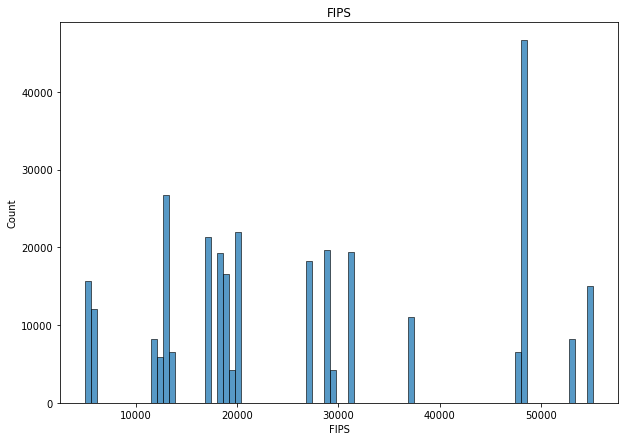

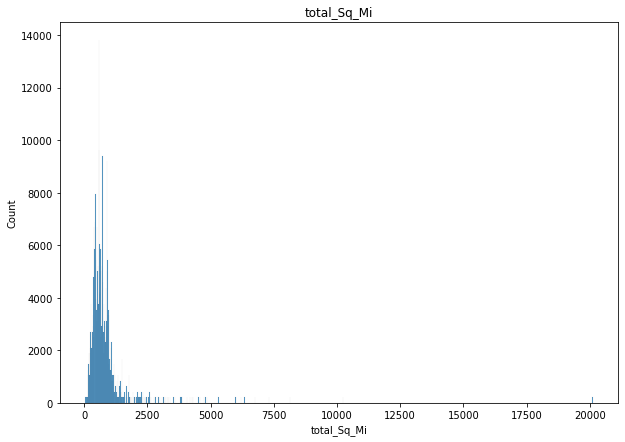

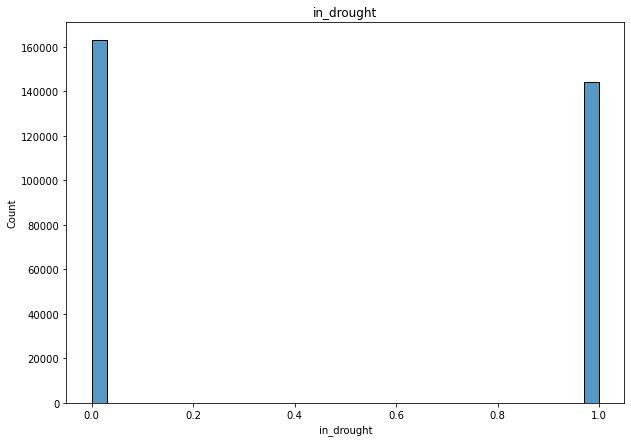

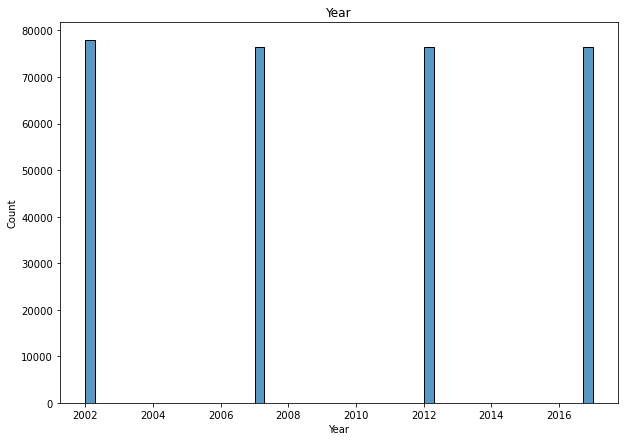

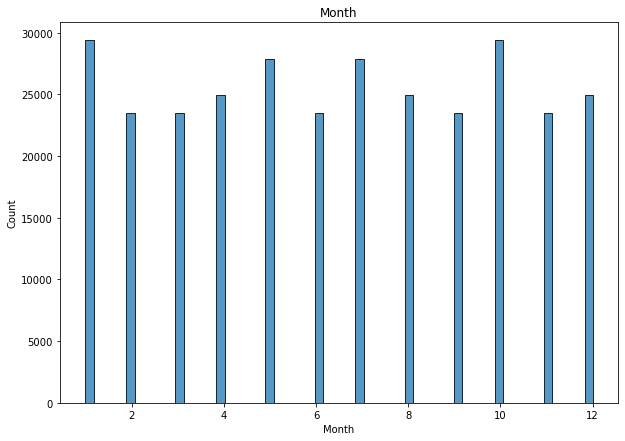

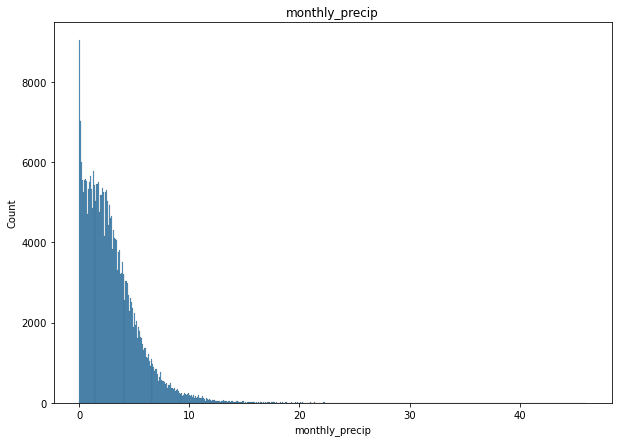

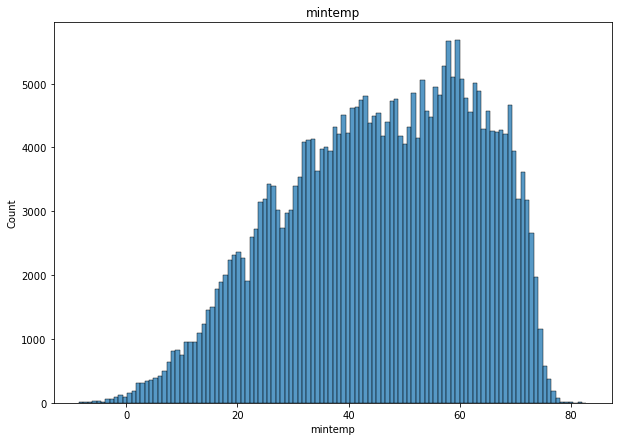

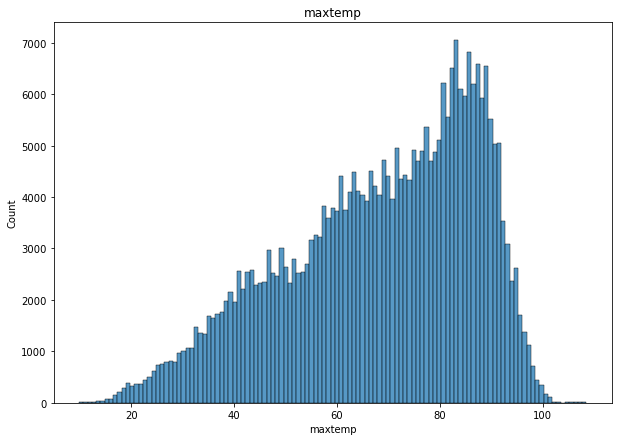

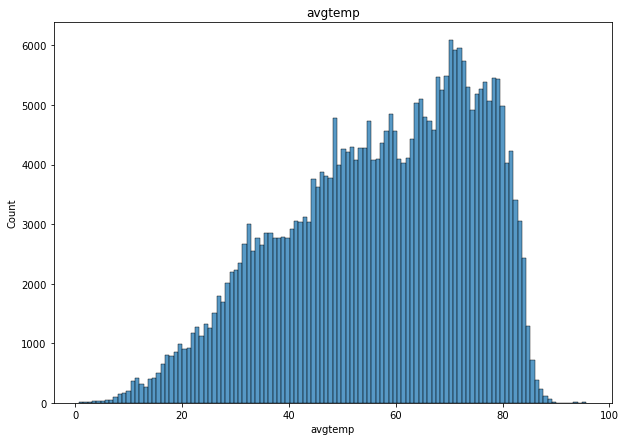

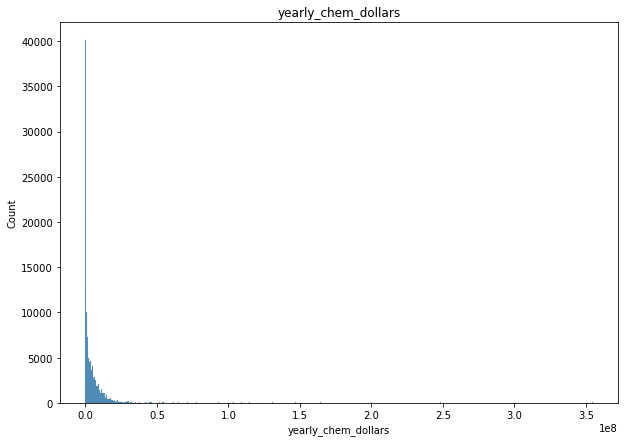

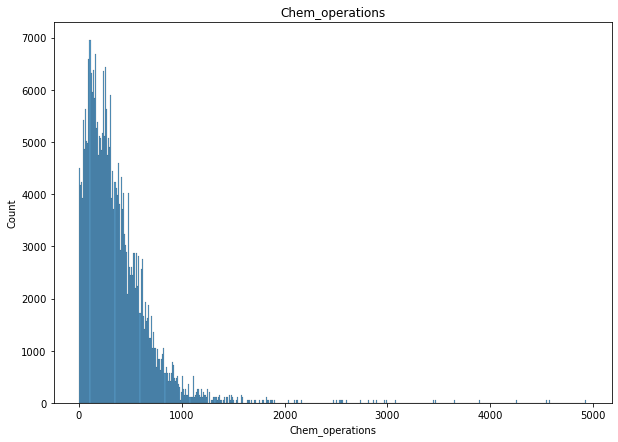

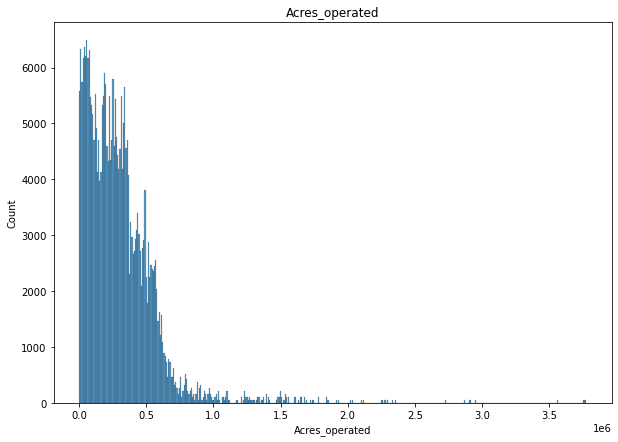

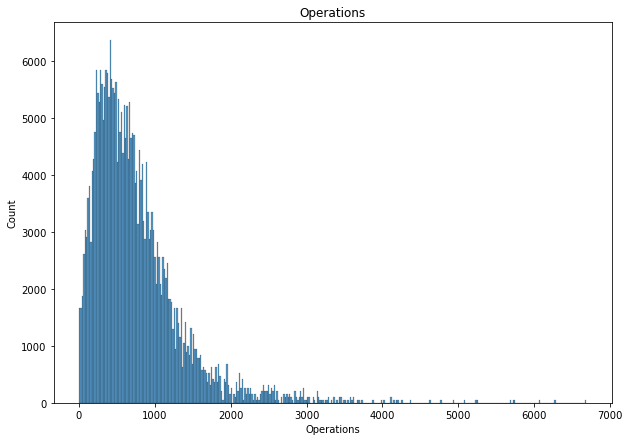

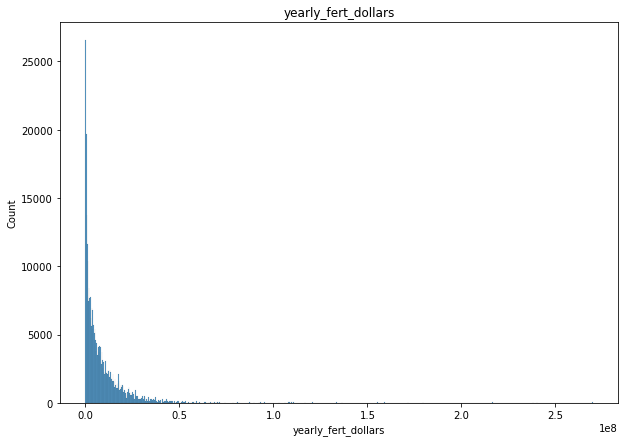

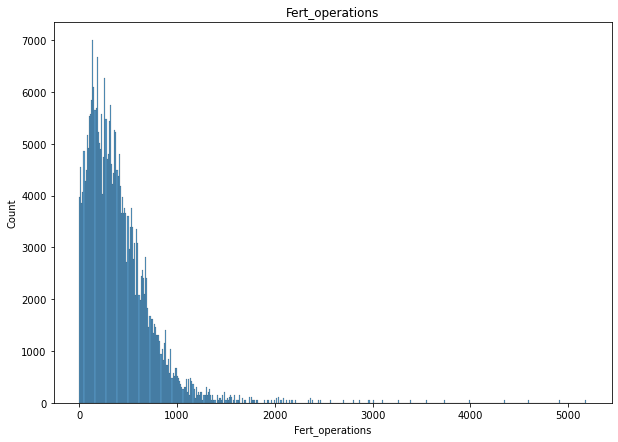

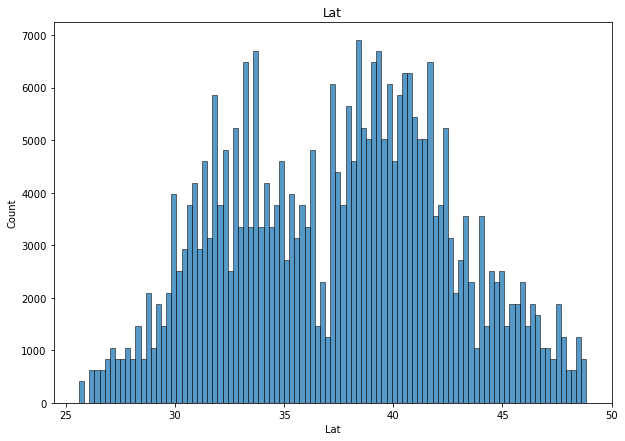

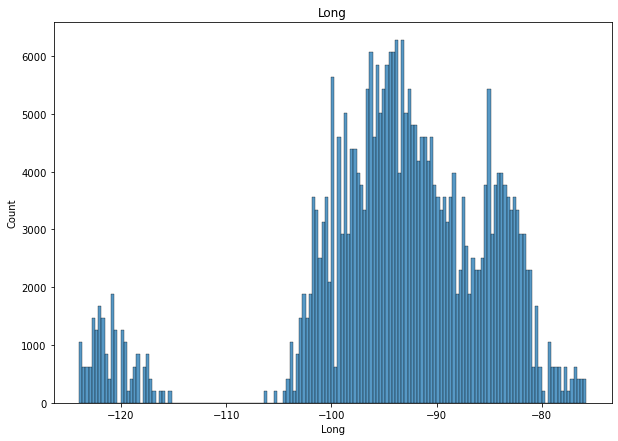

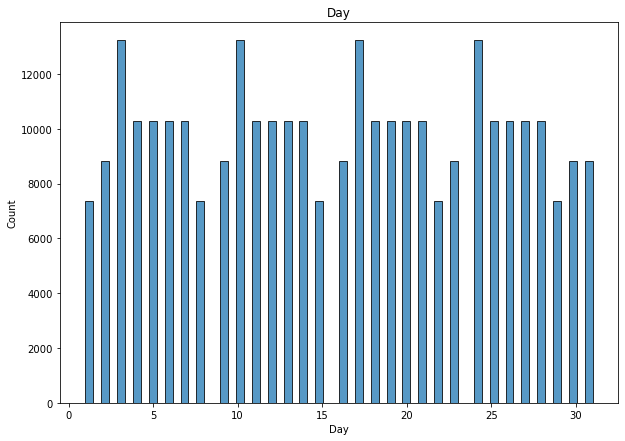

In [35]:
plt.rcParams['figure.figsize'] = (10.0, 7.0)
for column in soilClean.columns:
    sns.histplot(x=column, data=soilClean)
    plt.title(column)
    plt.show()

We do not have any distributions that appear to be normal at a glance. Some general observations:

* Months, years, and days seems to be evenly spread

* Precipitation appears to be logarithmic

* Minimum, Average, and Maximum temperature look slightly left-skewed

* The chemical and fertilizer dollars features appear to be logarithmic

* The operations columns and the acres column are right-skewed

* Latitude seems to have twin peaks, suggesting some separation between north and south in the data

* Longitude has a clear gap, likely with west coast states' counties around -120 longitude and most of the other counties between -105 and -85 long.


There are not any separations that seem incongruous with what we know about the data-- we know that much of the data is in the midwest and the south/southeast parts of the country, with two states on the west coast (California and Washington). This explains the split we see in longitude and some of the gap in latitude.

Year, Month, and Day all appear to be more or less evenly spread while the Agricultural columns are all skewed, if not bordering on logarthmic.

# Correlation
---
We can also check how the columns relate to each other by checking correlations. This will give us a sense of what features may have a stronger connection to our Target, 'in drought', and what features are closely related.

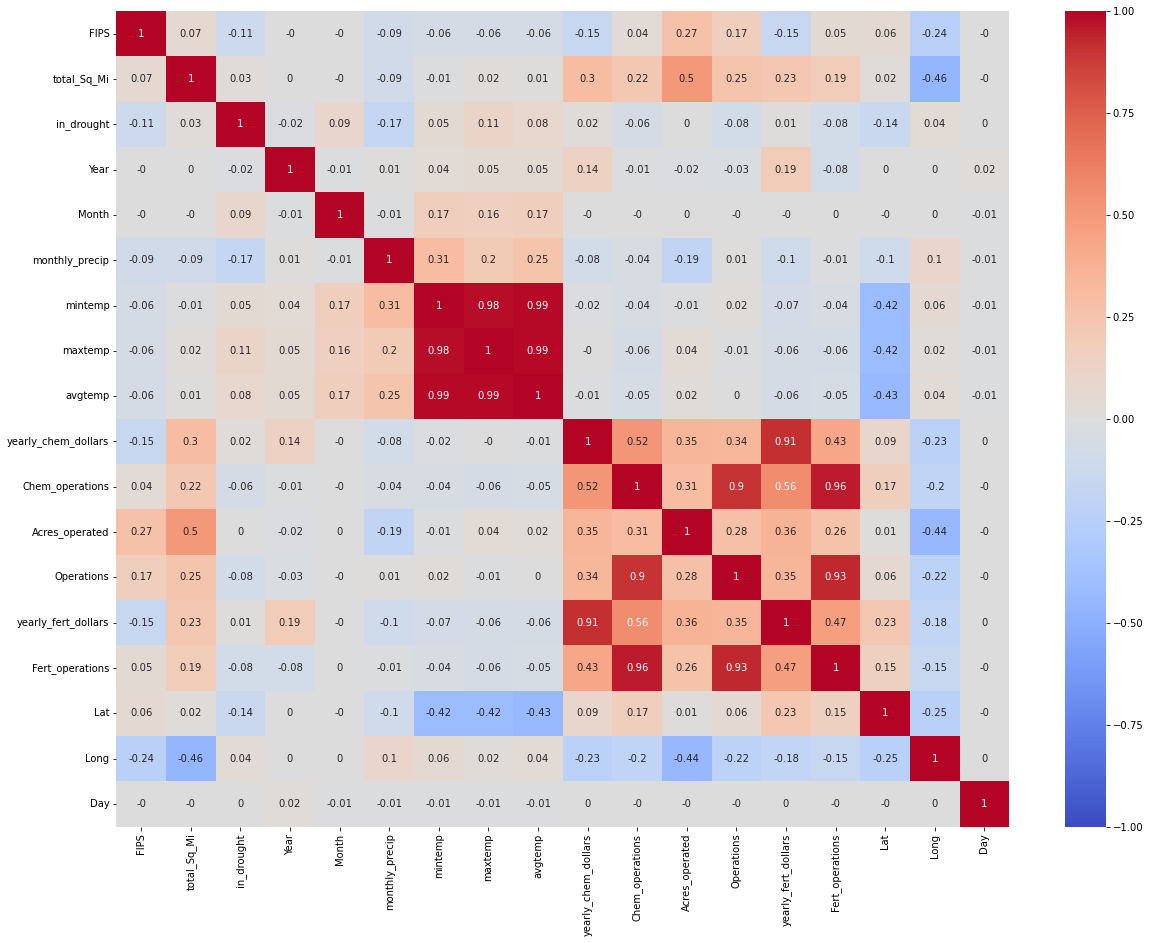

In [36]:
plt.rcParams['figure.figsize'] = (20.0, 15.0)
sns.heatmap(soilClean.corr().round(2), vmin=-1, vmax=1, cmap='coolwarm', annot=True)
plt.show()

In order to avoid issues with collinearity for a logistic regression, we may need to remove some of these columns. Our Decision Tree (and eventual Random Forest) models will be fine with all of the columns included.

We will likely keep the 'operations' column and drop the 'chem_operations' and 'fert_operations' due to their high correlation. For the weather data, We should be able to keep the monthly precipitation data but we will *definitely* need to choose one measure of temperature and drop the other two--correlations of .99 and .98 will cause issues with collinearity. maxtemp seems to have the strongest correlation with drought, so that is the top option for now.

Finally, we will need to do something about the yearly_fert_dollars and yearly_chem_dollars columns. They are closely correlated but in their case we may be able to combine them into one column rather than dropping one or the other.

We can also use the Pearson R test to figure out which of these correlations are statistically significant and this may help us decide on how to handle strongly correlated variables. Any P-Values below .05 are considered significant with the Pearson R test.

In [37]:
#dropping the target variable for the pearson test
soilClean_noDrought = soilClean.drop(columns='in_drought')

In [38]:
from scipy import stats
for col in soilClean_noDrought:
    corr, p = stats.pearsonr(soilClean_noDrought[col], soilClean['in_drought'])
    print(f' {col}\n Correlation coefficient: {corr}\n P-value: {p} \n')

 FIPS
 Correlation coefficient: -0.10519690498330275
 P-value: 0.0 

 total_Sq_Mi
 Correlation coefficient: 0.028426543156861436
 P-value: 6.435114598928318e-56 

 Year
 Correlation coefficient: -0.016642080127289505
 P-value: 2.9190780056342444e-20 

 Month
 Correlation coefficient: 0.08997236897308186
 P-value: 0.0 

 monthly_precip
 Correlation coefficient: -0.17410318778180298
 P-value: 0.0 

 mintemp
 Correlation coefficient: 0.04925474687766268
 P-value: 3.3841331642508703e-164 

 maxtemp
 Correlation coefficient: 0.10604506141435022
 P-value: 0.0 

 avgtemp
 Correlation coefficient: 0.07926141198122624
 P-value: 0.0 

 yearly_chem_dollars
 Correlation coefficient: 0.015455514259268447
 P-value: 1.0873813443233247e-17 

 Chem_operations
 Correlation coefficient: -0.05532787218042455
 P-value: 1.043830963544085e-206 

 Acres_operated
 Correlation coefficient: 0.0020215370204287667
 P-value: 0.26266277872367705 

 Operations
 Correlation coefficient: -0.07793826212865493
 P-value: 

Almost all of our variables have significant correlations with drought. Acres_operated has a higher p-value of .26 and does not appear to be significantly related to our drought condition. We do not have very *strong* correlations--monthly_precip, lat, and maxtemp have the strongest relationships with drought, at -.174, -.137, and .106, respectively.

# Graphing Relationships and Rates 
---
We know a bit more about our columns' distrubutions and how they may relate. We can use Matplotlib, Seaborn, and some of Pandas' graphing capabilities to plot some of the relationships between variables. We can also check the rate of drought for different features. There are three main sources of data that we will want to spend some time examining:

* Drought
* Weather
* Agricultural

In [39]:
#blanket reference for the matplotlib docs:
#https://matplotlib.org/stable/index.html
#setting the graph size
plt.rcParams['figure.figsize'] = (10.0, 7.0)

# Drought
---
We can start by checking the average rate of drought at the state level.

In [40]:
stateDroughtRates = (soil.groupby('State')['in_drought'].sum())/(soil.groupby('State')['in_drought'].count())
stateDroughtRates = stateDroughtRates.sort_values(ascending=False).reset_index(name='drought_rate')
stateDroughtRates

,State,drought_rate
0,GA,0.763685
1,CA,0.644118
2,NC,0.640065
3,NE,0.545094
4,KS,0.523718
5,FL,0.518460
6,TX,0.439325
7,MO,0.437589
8,MN,0.411813
9,AR,0.389665


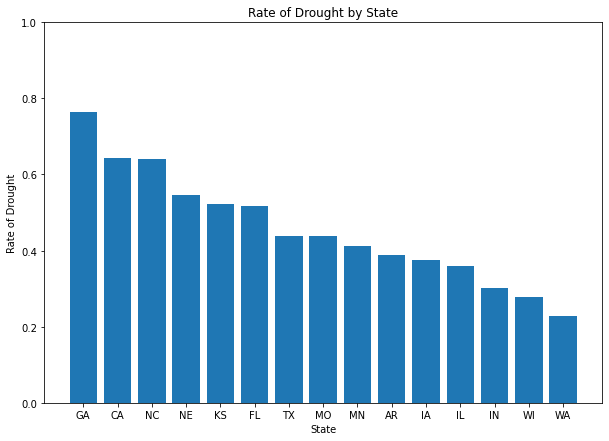

In [41]:
plt.figure()
plt.bar(stateDroughtRates['State'], stateDroughtRates['drought_rate'])
plt.ylim(0.0, 1.0)
plt.xlabel('State')
plt.ylabel('Rate of Drought')
plt.title('Rate of Drought by State')
plt.show()

Georgia has the highest rate of drought with Cailifornia and North Carolina roughly tied for second. The range seems to be between the mid 70's for Georgia, down to around 25% for Washington. Nebraska, Kansas, and Florida seem to be over 50% drought while the other states are below 50%.

We have about 1500 counties so seeing all of the at once would be tough to parse. We can try sorting them and checking the counties with the least and most drought.

In [42]:
(soil.groupby(['FIPS', 'State', 'County'])['in_drought'].sum())/(soil.groupby(['FIPS', 'State', 'County'])['in_drought'].count())

FIPS   State  County          
5001   AR     Arkansas County     0.358852
5003   AR     Ashley County       0.282297
5005   AR     Baxter County       0.473684
5007   AR     Benton County       0.459330
5009   AR     Boone County        0.483254
                                    ...   
55133  WI     Waukesha County     0.234450
55135  WI     Waupaca County      0.291866
55137  WI     Waushara County     0.215311
55139  WI     Winnebago County    0.200957
55141  WI     Wood County         0.282297
Name: in_drought, Length: 1469, dtype: float64

In [43]:
fipsDroughtRate = (
    soil.groupby(['FIPS', 'State', 'County'])['in_drought'].sum())/(
    soil.groupby(['FIPS', 'State', 'County'])['in_drought'].count())
fipsDroughtRate

FIPS   State  County          
5001   AR     Arkansas County     0.358852
5003   AR     Ashley County       0.282297
5005   AR     Baxter County       0.473684
5007   AR     Benton County       0.459330
5009   AR     Boone County        0.483254
                                    ...   
55133  WI     Waukesha County     0.234450
55135  WI     Waupaca County      0.291866
55137  WI     Waushara County     0.215311
55139  WI     Winnebago County    0.200957
55141  WI     Wood County         0.282297
Name: in_drought, Length: 1469, dtype: float64

In [44]:
#making a sub dataframe of the 10 counties with the highest drought rates
_10MostDrought = fipsDroughtRate.sort_values(ascending=False).reset_index(name='drought_rate').head(10)
_10MostDrought = _10MostDrought.sort_values(by='drought_rate', ascending=False)
_10MostDrought

,FIPS,State,County,drought_rate
0,6065,CA,Riverside County,0.976077
1,6037,CA,Los Angeles County,0.966507
2,6059,CA,Orange County,0.966507
3,6025,CA,Imperial County,0.961722
4,6111,CA,Ventura County,0.933014
5,31049,NE,Deuel County,0.928230
6,31033,NE,Cheyenne County,0.913876
7,6083,CA,Santa Barbara County,0.894737
8,13237,GA,Putnam County,0.889952
9,6069,CA,San Benito County,0.880383


Most of the counties with the highest rates of drought are in California, with a few from Nebraska making an appearance and one from Georgia.

In [45]:
#making a sub dataframe of the 10 counties with the lowest drought rates
_10LeastDrought = fipsDroughtRate.sort_values(ascending=False).reset_index(name='drought_rate').tail(10)
_10LeastDrought = _10LeastDrought.sort_values(by='drought_rate', ascending=False)
_10LeastDrought

,FIPS,State,County,drought_rate
1459,53035,WA,Kitsap County,0.090909
1460,53011,WA,Clark County,0.090909
1461,53067,WA,Thurston County,0.086124
1462,53015,WA,Cowlitz County,0.086124
1463,53045,WA,Mason County,0.081340
1464,53031,WA,Jefferson County,0.071770
1465,53027,WA,Grays Harbor County,0.071770
1466,53069,WA,Wahkiakum County,0.071770
1467,53009,WA,Clallam County,0.071770
1468,53049,WA,Pacific County,0.052632


The counties with the lowest drought rates are all in Washington, all under 10% drought on average.

We can plot these side by side in a subplot for a visual representation

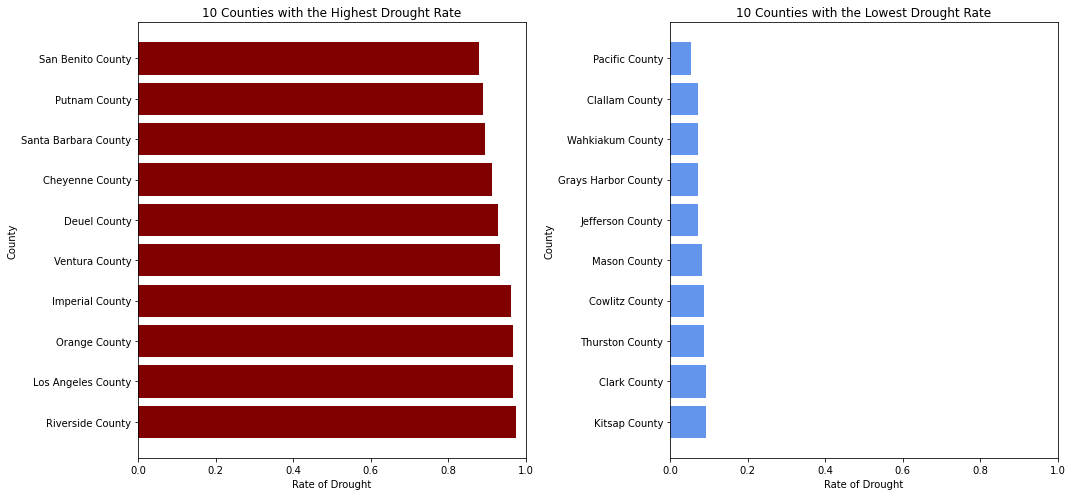

In [46]:
plt.rcParams['figure.figsize'] = (15.0, 7.0)

plt.subplots(1, 2)

plt.subplot(1, 2, 2)
plt.barh(_10LeastDrought['County'], _10LeastDrought['drought_rate'], color = 'cornflowerblue')
plt.xlim(0.0, 1.0)
plt.xlabel('Rate of Drought')
plt.ylabel('County')
plt.title('10 Counties with the Lowest Drought Rate')

plt.subplot(1, 2, 1)
plt.barh(_10MostDrought['County'], _10MostDrought['drought_rate'], color = 'maroon')
plt.xlim(0.0, 1.0)
plt.xlabel('Rate of Drought')
plt.ylabel('County')
plt.title('10 Counties with the Highest Drought Rate')


plt.tight_layout()

plt.show()

Next, we will plot out the drought rate for each week observed in the dataset. This should give us a sense of when the Farmland states were experiencing more or less drought as a whole. 

In [47]:
weekDroughtRates = (soil.groupby(['Date'])['in_drought'].sum())/(soil.groupby(['Date'])['in_drought'].count())

In [48]:
#checking where the lowest 5 weeks and the highest five weeks land
weekDroughtRates.sort_values()

Date
2017-06-06    0.132743
2017-05-23    0.155208
2017-06-20    0.162696
2017-07-11    0.164057
2017-05-02    0.166780
                ...   
2012-09-25    0.840027
2012-07-10    0.843431
2012-09-11    0.846835
2012-12-04    0.857726
2012-11-27    0.863853
Name: in_drought, Length: 209, dtype: float64

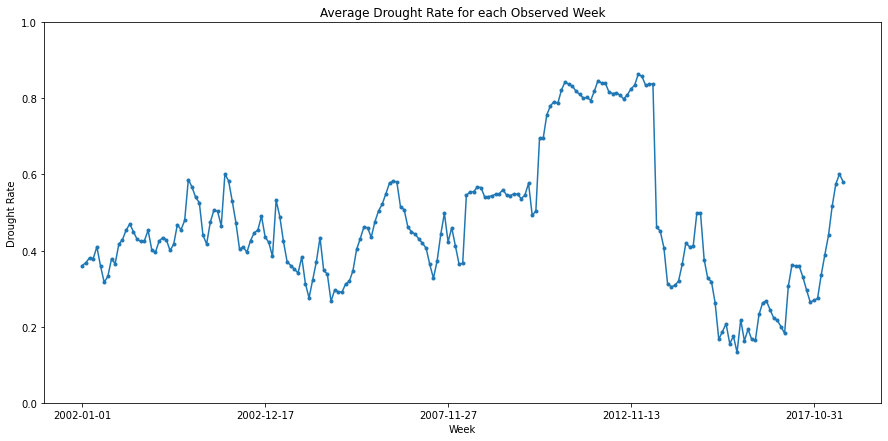

In [49]:
plt.figure()
weekDroughtRates.plot(marker='.')
plt.xlabel('Week')
plt.ylabel('Drought Rate')
plt.ylim(0,1)
plt.title('Average Drought Rate for each Observed Week')
plt.show()

There is some fluctuation in 2002 and 2007 and a large jump in drought rates for much of 2012 and a dip in the drought rate 5 years later for 2017. The year an observation lands in may have some significance: for the years we are examining it seems that if there is drought, it is *pronounced* and noticeable.

Lets look at this a bit more by plotting the counts of 'in drought' vs 'not in drought' for each year.

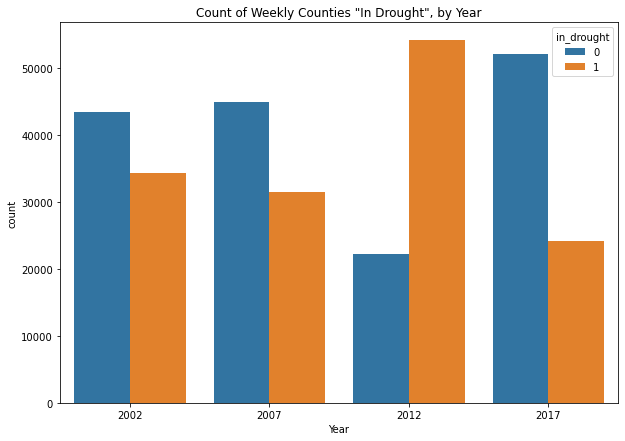

In [50]:
#resetting the plot size back to normal
plt.rcParams['figure.figsize'] = (10.0, 7.0)

droughtByYear = sns.countplot(
    x = 'Year', data = soil, hue = 'in_drought')
droughtByYear.set_title('Count of Weekly Counties "In Drought", by Year')
plt.show()

2002 and 2007 are similar to each other with less drought overall.

2012 had the most county-weeks of drought and 2017 had the least--these years seem to be almost reversed in their rates of drought. This effect was hard to see in the previous plot, but if 2012 was clearly a "dry" year, then 2017 is clearly a "wet" year.

We will break down the drought rates by month too.

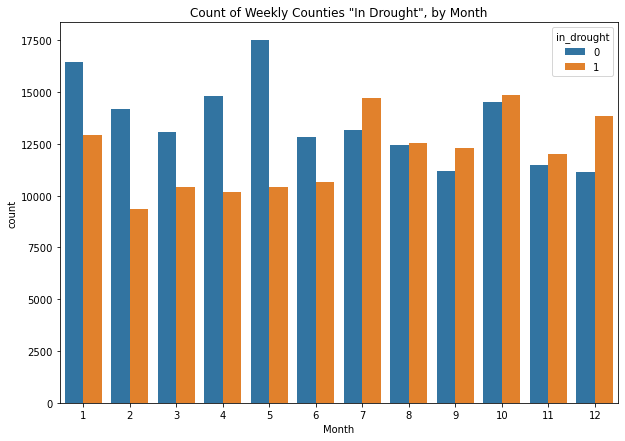

In [51]:
droughtByMonth = sns.countplot(
    x = 'Month', data = soil, hue = 'in_drought')
droughtByMonth.set_title('Count of Weekly Counties "In Drought", by Month')
plt.show()

The second half of the year seems to have more 'in drought" observations in general, with December appearing to be the "dryest" month of the year. We can look at this in terms of the actual percent of drought for each month.

In [52]:
monthDroughtRates = (soil.groupby(['Month'])['in_drought'].sum())/(soil.groupby(['Month'])['in_drought'].count())*100
monthDroughtRates

Month
1     44.016338
2     39.759190
3     44.303097
4     40.659913
5     37.329368
6     45.375255
7     52.746229
8     50.238257
9     52.297481
10    50.544588
11    51.165759
12    55.479918
Name: in_drought, dtype: float64

In [53]:
#resetting the plot size
plt.rcParams['figure.figsize'] = (10.0, 7.0)

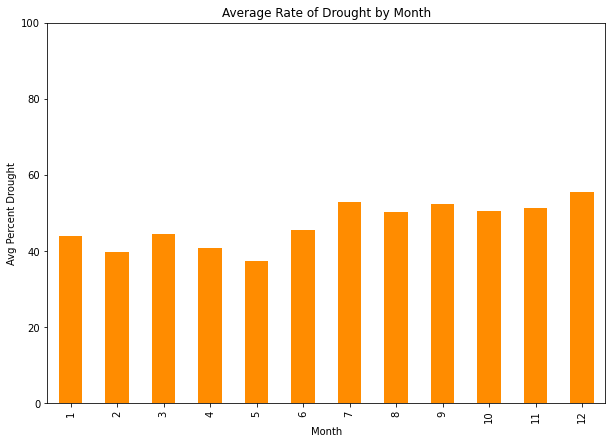

In [54]:
plt.figure()
monthDroughtRates.plot(kind='bar', color='darkorange')
plt.ylim(0, 100)
plt.ylabel('Avg Percent Drought')
plt.title('Average Rate of Drought by Month')
plt.show()

That is a bit clearer: the drought rate fluctuates between just under 40% in May to about 55% in December.

# Agriculture
---
Because our chemical and fertilizer costs are yearly amounts applied at the weekly level, we can use the mean values to get the yearly average for each state. The Agricultural data is generally in the thousands or millions for each observation--for the cost features we can divide them by one million and represent the values in millions of dollars spent.

In [55]:
yearlyChemExp_StateMillions = (round(soil.groupby(['State'])['yearly_chem_dollars'].mean())/1000000)
yearlyChemExp_StateMillions

State
AR     5.282435
CA    30.449136
FL     6.740979
GA     1.988236
IA     8.591078
IL     8.881492
IN     4.925370
KS     5.019503
MN     6.830371
MO     3.385142
NC     2.867203
NE     6.182157
TX     2.228134
WA    10.626876
WI     4.056072
Name: yearly_chem_dollars, dtype: float64

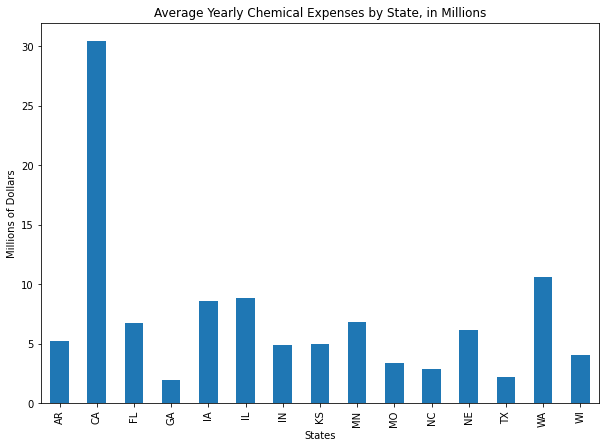

In [56]:
plt.figure()
yearlyChemExp_StateMillions.plot(kind='bar')
plt.title('Average Yearly Chemical Expenses by State, in Millions')
plt.xlabel('States')
plt.ylabel('Millions of Dollars')
plt.show()

**California leads the farmland states in spending on chemical inputs with 30 million dollars annually**. Washington is second with about a third of the spending at 10 million dollars annually. 

We will check the levels of fertilizer spending for each state as well.

In [57]:
yearlyFertExp_StateMillions = (round(soil.groupby(['State'])['yearly_fert_dollars'].mean())/1000000)
yearlyFertExp_StateMillions

State
AR     5.751870
CA    26.002149
FL     6.926340
GA     2.346867
IA    16.224587
IL    15.733681
IN    10.307696
KS     8.098276
MN    13.855873
MO     6.202194
NC     3.769662
NE    11.355261
TX     3.587524
WA    10.550105
WI     8.218348
Name: yearly_fert_dollars, dtype: float64

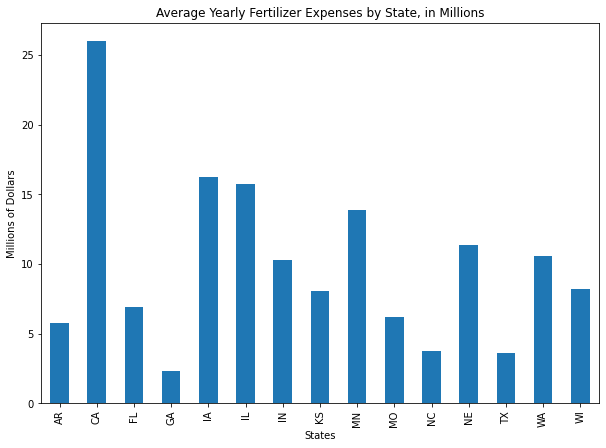

In [58]:
plt.figure()
yearlyFertExp_StateMillions.plot(kind='bar')
plt.title('Average Yearly Fertilizer Expenses by State, in Millions')
plt.xlabel('States')
plt.ylabel('Millions of Dollars')
plt.show()

Once again, California leads in fertilizer spending at an average of 26 million dollars a year. Iowa, Illinois and Minnesota trail it with between 16 and 14 million dollars on average. If we combine these features into one (which we will likely need to do for our models), we can look at the total spending for both of these major inputs in conventional agriculture. This can serve as our operational definition for the level of conventional agriculture practices in a county or state.

We'll aggregate this at the state level.

In [59]:
# combining the two as one operational definition of conventional agriculture levels
yearlyConvAgExp_State = yearlyChemExp_StateMillions+yearlyFertExp_StateMillions
yearlyConvAgExp_State

State
AR    11.034305
CA    56.451285
FL    13.667319
GA     4.335103
IA    24.815665
IL    24.615173
IN    15.233066
KS    13.117779
MN    20.686244
MO     9.587336
NC     6.636865
NE    17.537418
TX     5.815658
WA    21.176981
WI    12.274420
dtype: float64

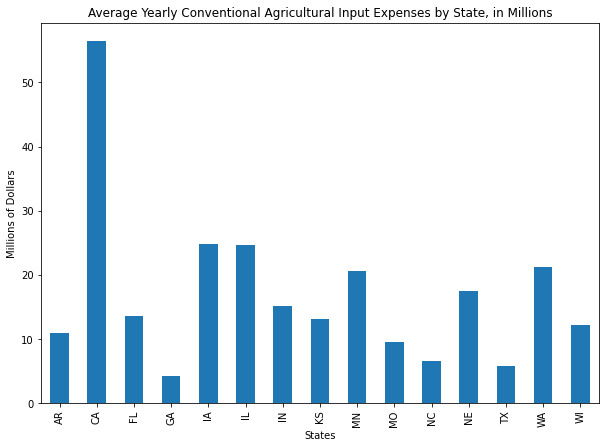

In [60]:
plt.figure()
yearlyConvAgExp_State.plot(kind='bar')
plt.title('Average Yearly Conventional Agricultural Input Expenses by State, in Millions')
plt.xlabel('States')
plt.ylabel('Millions of Dollars')
plt.show()

This is very similar to the fertilizer levels, but at a large scale. California is still the frontrunner with Iowa and Illinois roughly tied for second.

This raises the question, what is the average per acre? California has a greater area than Iowa or Illinois so we could be seeing an effect of California having more arable land instead of more spending per acre. We'll check the total spending per acre for chemical and fertilizer inputs next to test this.

In [61]:
#setting up the average acres operated for each state
yearlyAcresOp_state = round(soil.groupby(['State'])['Acres_operated'].mean())
yearlyAcresOp_state

State
AR    186949.0
CA    444408.0
FL    145357.0
GA     63650.0
IA    312321.0
IL    264793.0
IN    161754.0
KS    441635.0
MN    304605.0
MO    252288.0
NC     82501.0
NE    488471.0
TX    508019.0
WA    382860.0
WI    207863.0
Name: Acres_operated, dtype: float64

In [62]:
#getting the dollars spent per acre on fertilizer
yearlyFertDollars_Acres = (yearlyFertExp_StateMillions*1000000)/yearlyAcresOp_state
yearlyFertDollars_Acres

State
AR    30.767054
CA    58.509633
FL    47.650543
GA    36.871438
IA    51.948434
IL    59.418795
IN    63.724520
KS    18.337034
MN    45.488002
MO    24.583785
NC    45.692319
NE    23.246541
TX     7.061791
WA    27.556039
WI    39.537330
dtype: float64

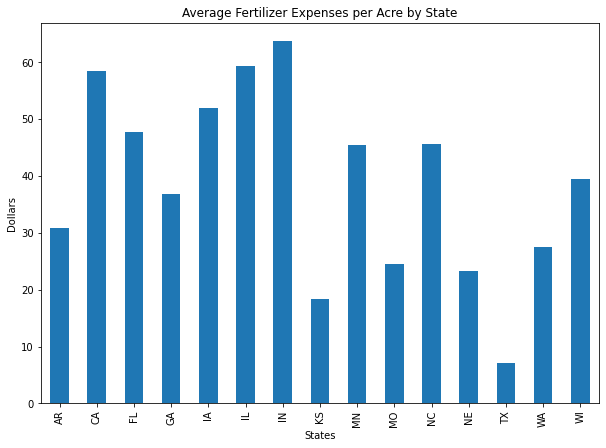

In [63]:
plt.figure()
yearlyFertDollars_Acres.plot(kind='bar')
plt.title('Average Fertilizer Expenses per Acre by State')
plt.xlabel('States')
plt.ylabel('Dollars')
plt.show()

Once we break the costs down by acre Illinois and Indiana outpace California. Texas' cost per acre seems conspicuously low-- after some brief research, it seems that the cost of fertilizer has caught up in Texas. 

Checking the mid-point in our studied year, 2009, there was a 50% increase in fertilizer costs (page 14):

https://afpc.tamu.edu/research/publications/524/wp-2009-1%20Jan%20Baseline%20-%20web.pdf

We'll check the per-acre cost for chemicals alone.

In [64]:
#getting the dollars spent per acre on chemicals
yearlyChemDollars_Acres = (yearlyChemExp_StateMillions*1000000)/yearlyAcresOp_state
yearlyChemDollars_Acres

State
AR    28.256022
CA    68.516174
FL    46.375331
GA    31.237015
IA    27.507206
IL    33.541264
IN    30.449757
KS    11.365727
MN    22.423700
MO    13.417769
NC    34.753555
NE    12.656139
TX     4.385927
WA    27.756559
WI    19.513199
dtype: float64

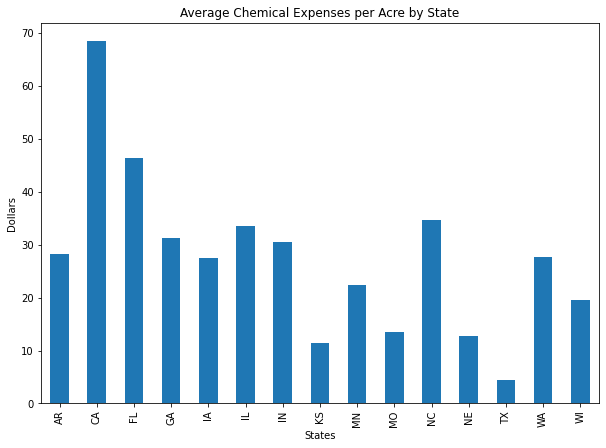

In [65]:
plt.figure()
yearlyChemDollars_Acres.plot(kind='bar')
plt.title('Average Chemical Expenses per Acre by State')
plt.xlabel('States')
plt.ylabel('Dollars')
plt.show()

California returns to the top, indicating that it's higher spending is not purely based on the amount of land being farmed. Florida emerges as a high per-acre consumer of chemical inputs, in second with ~46 dollars an acre.

If we combine these costs we can see how the states shake out for Conventional Agriculture inputs.

In [66]:
#multiplying by 1 million to get the dollars per acre
yearlyConvAgDollars_Acres = (yearlyChemDollars_Acres+yearlyFertDollars_Acres)
yearlyConvAgDollars_Acres

State
AR     59.023076
CA    127.025807
FL     94.025874
GA     68.108452
IA     79.455640
IL     92.960059
IN     94.174277
KS     29.702761
MN     67.911702
MO     38.001554
NC     80.445873
NE     35.902680
TX     11.447718
WA     55.312597
WI     59.050528
dtype: float64

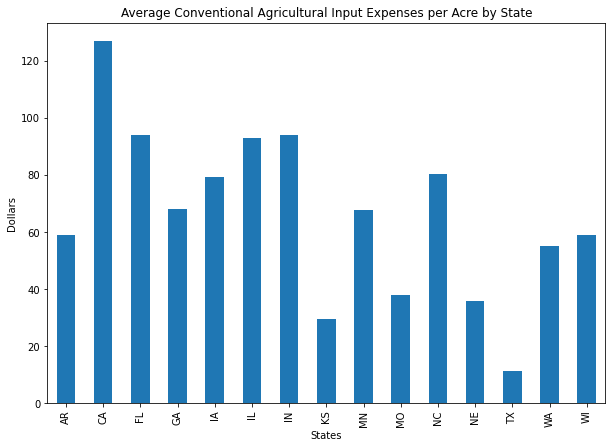

In [67]:
plt.figure()
yearlyConvAgDollars_Acres.plot(kind='bar')
plt.title('Average Conventional Agricultural Input Expenses per Acre by State')
plt.xlabel('States')
plt.ylabel('Dollars')
plt.show()

California is still the clear leader in costs per acre, while Florida, Illinois, and Indiana have emerged as a rough tie for 2nd place in spending per acre. This combined metric for tracking expenses per acre seems to be effective at portraying the spending while reguarlizing the costs by bringing them dwon to the per-acre level. Once we perform some analysis for the Weather data we can work on creating a combined feature from the yearly chemical and fertilizer costs.

# Weather
---
We will need to narrow down our weather features to the maxtemp and monthly_precip features, so we will focus on these two for the analysis. We can start by checking the way precipitation and maximum tempereature interact over the course of years and months, and follow that by checking precipitation levels as the max temperature increases.

*To clarify/as a reminder: temperatures are in Fahrenheit and precipitation is in inches.

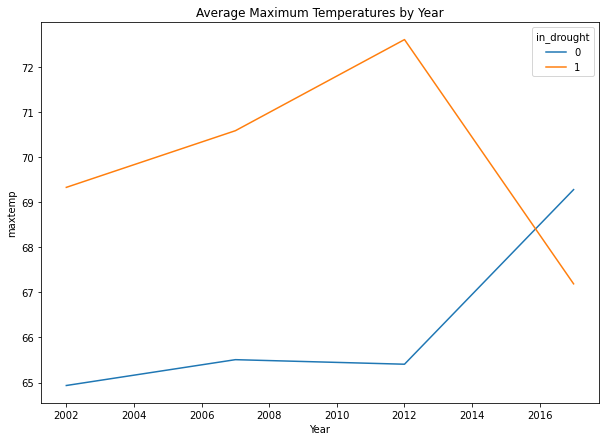

In [68]:
#start with years
maxtemp_year = sns.lineplot(
    y = 'maxtemp',
    x = 'Year',
    data = soil,
    hue='in_drought',
    ci=None)
maxtemp_year.set_title('Average Maximum Temperatures by Year')
plt.show()

We know that 2012 had a higher drought rate overall and when we plot the average maximum temperatures for each year, there is a clear spike in temperature for 2012's positive drought observations.

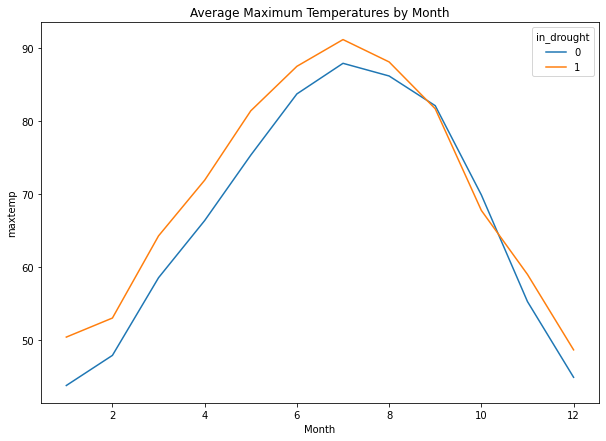

In [69]:
#checking months
maxtemp_month = sns.lineplot(
    y = 'maxtemp',
    x = 'Month',
    data = soil,
    hue='in_drought',
    ci=None)
maxtemp_month.set_title('Average Maximum Temperatures by Month')
plt.show()

The positive drought observations tend to come with higher temperatures until September, where the relationship between temperature and drought breaks down.

Lets apply a similar analysis to precipitation.

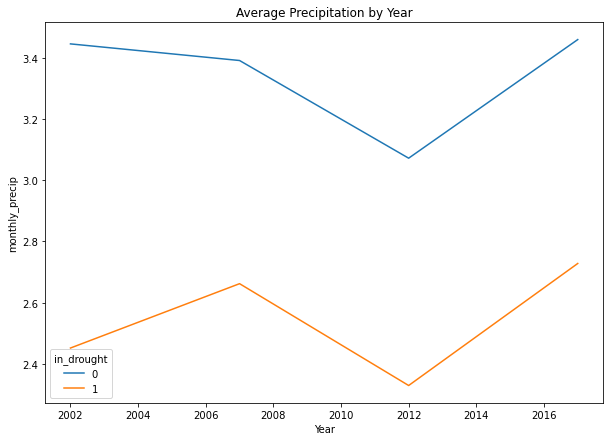

In [70]:
#precip by year
precip_year = sns.lineplot(
    y = 'monthly_precip',
    x = 'Year',
    data = soil,
    hue='in_drought',
    ci=None)
precip_year.set_title('Average Precipitation by Year')
plt.show()

We saw hints of this before, but there was lower precipitation for both the in drought and not in drought observations in 2012. The in drought observations are all roughly an inch less in average precipitation.

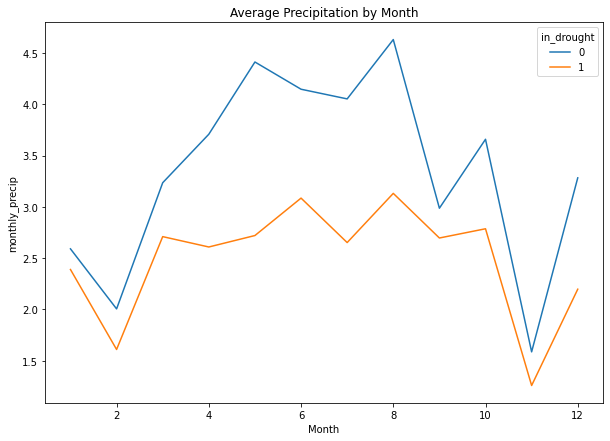

In [71]:
#precip by month
precip_month = sns.lineplot(
    y = 'monthly_precip',
    x = 'Month',
    data = soil,
    hue='in_drought',
    ci=None)
precip_month.set_title('Average Precipitation by Month')
plt.show()

We see clear peaks for the not in drought observations at the end of spring (May, month 5) and the end of summer (August, month 8) paired with clear valleys in February and November.

We can combine maximum temperature and precipitation in a scatterplot and see how they interact with each other and with drought.

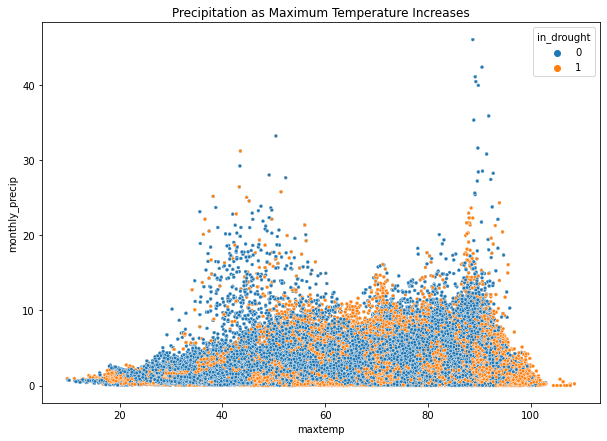

In [72]:
#checking precipitation against max temp for all states and years
maxtemp_precip = sns.scatterplot(
    x = 'maxtemp',
    y = 'monthly_precip',
    hue = 'in_drought',
    data = soil,
    s=10,)
maxtemp_precip.set_title('Precipitation as Maximum Temperature Increases')
plt.show()

Drought seems to be spread throughout levels of precipitation and temperatures, but there seems to be a higher rate of drought toward the bottom left of the graph--where temperatures are highest and precipitation is lowest. California is emerging as having both high drought rates and high costs--we can plot this for California alone.

In [73]:
#setting up a sub-dataframe for California only
soilCali = soil[soil['State']=='CA']
soilCali

,Date,FIPS,County,State,total_Sq_Mi,in_drought,Year,Month,monthly_precip,mintemp,maxtemp,avgtemp,yearly_chem_dollars,Chem_operations,Acres_operated,Operations,yearly_fert_dollars,Fert_operations,Lat,Long,Day
15675,2017-12-26,6015,Del Norte County,CA,1020.10,0,2017,12,3.88,36.7,50.4,43.6,373566.0,23.0,19770.0,90,548000.0,23.0,41.749903,-123.98099,26
15676,2017-12-19,6015,Del Norte County,CA,1020.10,0,2017,12,3.88,36.7,50.4,43.6,373566.0,23.0,19770.0,90,548000.0,23.0,41.749903,-123.98099,19
15677,2017-12-12,6015,Del Norte County,CA,1020.10,0,2017,12,3.88,36.7,50.4,43.6,373566.0,23.0,19770.0,90,548000.0,23.0,41.749903,-123.98099,12
15678,2017-12-05,6015,Del Norte County,CA,1020.10,0,2017,12,3.88,36.7,50.4,43.6,373566.0,23.0,19770.0,90,548000.0,23.0,41.749903,-123.98099,5
15679,2017-11-28,6015,Del Norte County,CA,1020.10,0,2017,11,13.35,39.5,49.4,44.5,373566.0,23.0,19770.0,90,548000.0,23.0,41.749903,-123.98099,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27792,2002-01-29,6071,San Bernardino County,CA,20117.76,0,2002,1,0.14,36.2,59.0,47.6,3881000.0,611.0,513642.0,1386,4311000.0,655.0,34.857220,-116.18119,29
27793,2002-01-22,6071,San Bernardino County,CA,20117.76,0,2002,1,0.14,36.2,59.0,47.6,3881000.0,611.0,513642.0,1386,4311000.0,655.0,34.857220,-116.18119,22
27794,2002-01-15,6071,San Bernardino County,CA,20117.76,0,2002,1,0.14,36.2,59.0,47.6,3881000.0,611.0,513642.0,1386,4311000.0,655.0,34.857220,-116.18119,15
27795,2002-01-08,6071,San Bernardino County,CA,20117.76,0,2002,1,0.14,36.2,59.0,47.6,3881000.0,611.0,513642.0,1386,4311000.0,655.0,34.857220,-116.18119,8


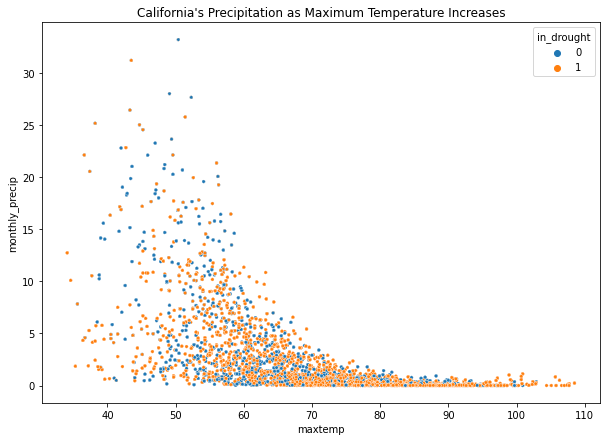

In [74]:
#trying out california
maxtemp_precip = sns.scatterplot(
    x = 'maxtemp',
    y = 'monthly_precip',
    hue = 'in_drought',
    data = soilCali,
    s=10,)
maxtemp_precip.set_title("California's Precipitation as Maximum Temperature Increases")
plt.show()

Precipitation levels drop ...precipitously... around 70 degrees fahrenheit. Drought is still diffuse throughout temperature and precipitation levels. Next, we can break this down by year. This should show the differences between 2012's increased drought to 2017's relatively low drought. We will keep the data limited to California.

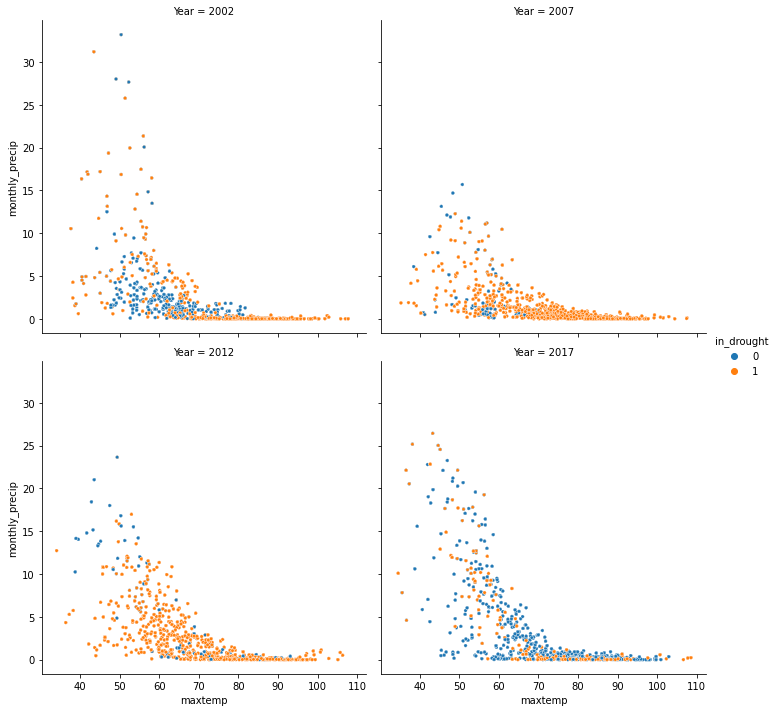

In [75]:
#checking california's maxtemp vs precip for each year with subplots

maxtemp_precip = sns.relplot(
    x = 'maxtemp',
    y = 'monthly_precip',
    hue = 'in_drought',
    col = 'Year',
    data = soilCali,
    col_wrap=2,
    s=10,)

plt.show()

2002 and 2017 seem to have lower drought rates and a greater range of precipitation in the lower temperatures. 2007 and 2012 have higher drought, and 2007 has a noticiably tighter range of precipitation levels below 70 degrees. All four years have the same effect of dropping precipitation as the temperatures move past 70 degrees. The drought analysis showed Washington with the lowest drought rates overall. We can set up a similar plot for Washington as a foil to compare to California.

In [76]:
soilWash = soil[soil['State']=='WA']
soilWash

,Date,FIPS,County,State,total_Sq_Mi,in_drought,Year,Month,monthly_precip,mintemp,maxtemp,avgtemp,yearly_chem_dollars,Chem_operations,Acres_operated,Operations,yearly_fert_dollars,Fert_operations,Lat,Long,Day
283613,2017-12-26,53009,Clallam County,WA,1781.05,0,2017,12,11.16,32.0,42.6,37.3,144000.0,139.0,17197.0,528,462000.0,184.0,48.113009,-123.93061,26
283614,2017-12-19,53009,Clallam County,WA,1781.05,0,2017,12,11.16,32.0,42.6,37.3,144000.0,139.0,17197.0,528,462000.0,184.0,48.113009,-123.93061,19
283615,2017-12-12,53009,Clallam County,WA,1781.05,0,2017,12,11.16,32.0,42.6,37.3,144000.0,139.0,17197.0,528,462000.0,184.0,48.113009,-123.93061,12
283616,2017-12-05,53009,Clallam County,WA,1781.05,0,2017,12,11.16,32.0,42.6,37.3,144000.0,139.0,17197.0,528,462000.0,184.0,48.113009,-123.93061,5
283617,2017-11-28,53009,Clallam County,WA,1781.05,0,2017,11,22.94,36.9,45.8,41.3,144000.0,139.0,17197.0,528,462000.0,184.0,48.113009,-123.93061,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307016,2002-01-29,53029,Island County,WA,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.67050,29
307017,2002-01-22,53029,Island County,WA,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.67050,22
307018,2002-01-15,53029,Island County,WA,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.67050,15
307019,2002-01-08,53029,Island County,WA,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.67050,8


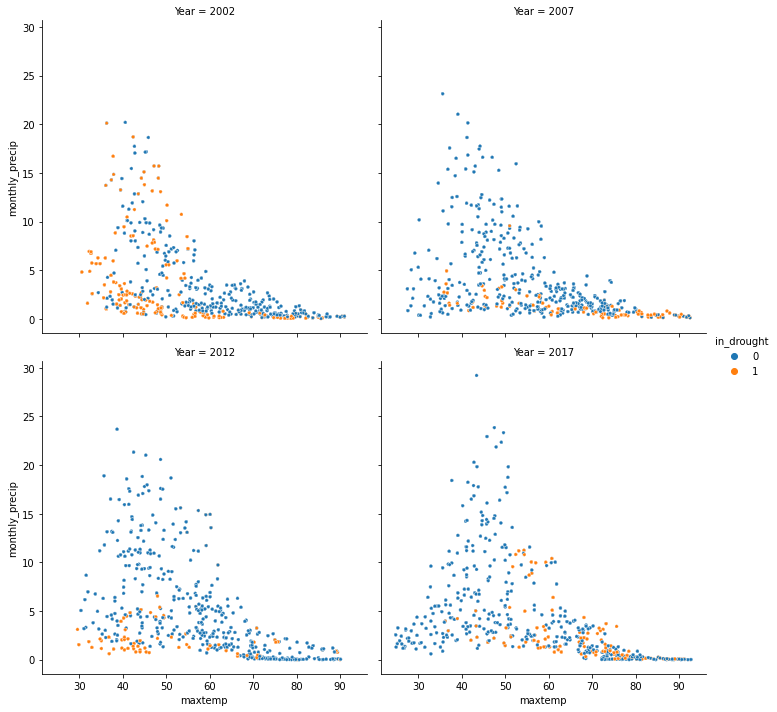

In [77]:
#checking washingtons's maxtemp vs precip for each year with subplots

maxtemp_precip = sns.relplot(
    x = 'maxtemp',
    y = 'monthly_precip',
    hue = 'in_drought',
    col = 'Year',
    data = soilWash,
    col_wrap=2,
    s=10,)

plt.show()

Two things jump out:
* Washington's maximum temperature peaks about 20 degrees lower than California's
* Precipitation still drops around 70 degrees

# Combining Agricultural Expenses
---
From the correlation heatmap we know that the fertilizer and chemical expenses and operations are very strongly correlated. Because of this correlation, we will need to remove some of these columns to avoid collinearity issues. This removal is less of a worry for the operations features as they are not quite as pertinent to our end goal of examining the costs of conventional agriculture inputs and the likelihood of drought.

For the Chemical and fertilizer expenses instead of *removing* one, we can combine them into one column. The expenses related to chemicals or fertilizers have been our way to measure the level of conventional agriculture practices for different counties or states. It makes sense to combine these into one column to serve as our operational means of measuring conventional ag practices: yearly_conv_input_exp

We will take a look at it's Pearson R test with 'in_drought' to get a sense for their relationship and set up a histogram for it to check distribution.

In [78]:
#creating a new combined column
soil['yearly_conv_input_exp'] = soil['yearly_chem_dollars'] + soil['yearly_fert_dollars']
soil

,Date,FIPS,County,State,total_Sq_Mi,in_drought,Year,Month,monthly_precip,mintemp,maxtemp,avgtemp,yearly_chem_dollars,Chem_operations,Acres_operated,Operations,yearly_fert_dollars,Fert_operations,Lat,Long,Day,yearly_conv_input_exp
0,2017-12-26,5007,Benton County,AR,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187,26,4039000.0
1,2017-12-19,5007,Benton County,AR,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187,19,4039000.0
2,2017-12-12,5007,Benton County,AR,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187,12,4039000.0
3,2017-12-05,5007,Benton County,AR,873.97,1,2017,12,1.92,28.8,48.9,38.9,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187,5,4039000.0
4,2017-11-28,5007,Benton County,AR,873.97,1,2017,11,1.58,40.7,62.7,51.7,1072000.0,702.0,243753.0,1936,2967000.0,798.0,36.337825,-94.256187,28,4039000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307016,2002-01-29,53029,Island County,WA,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.670500,29,220000.0
307017,2002-01-22,53029,Island County,WA,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.670500,22,220000.0
307018,2002-01-15,53029,Island County,WA,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.670500,15,220000.0
307019,2002-01-08,53029,Island County,WA,213.97,0,2002,1,3.90,36.6,45.6,41.1,85000.0,70.0,15018.0,348,135000.0,72.0,48.158436,-122.670500,8,220000.0


In [79]:
#checking the correlation for the new column
corr, p = stats.pearsonr(soil['yearly_conv_input_exp'], soil['in_drought'])
print(f'Yearly Conventional Input Expenses\n Correlation coefficient: {corr}\n P-value: {p} \n')

Yearly Conventional Input Expenses
 Correlation coefficient: 0.014433397441306842
 P-value: 1.2660651944449923e-15 



Our new column, yearly_conv_input_exp, is significantly related to the in drought target variable, but it is not a strong relationship: A 1.4% correlation.

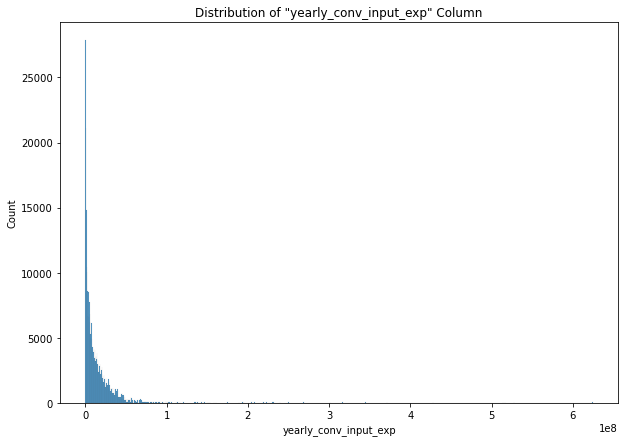

In [80]:
sns.histplot(x='yearly_conv_input_exp', data=soil)
plt.title('Distribution of "yearly_conv_input_exp" Column')
plt.show()

Similar to the chemical and fertilizer features when they were separate, the distribution of the combined conventional agriculture inputs feature seems to be on a log scale.

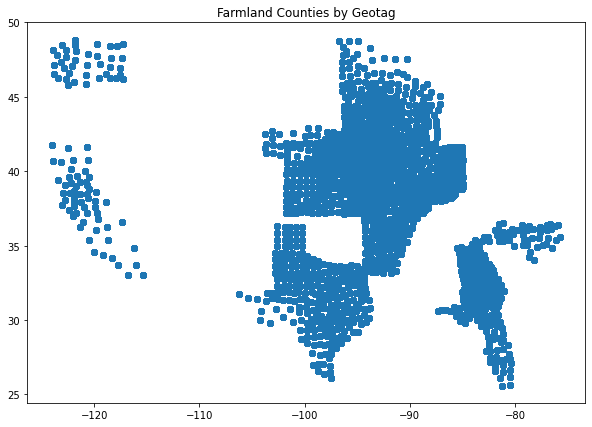

In [81]:
#This is 10% for checking out latitude and longitudes are right, and 90% for fun. 
#Who doesn't like a nice map?
plt.figure()
plt.scatter(soil['Long'], soil['Lat'])
plt.title('Farmland Counties by Geotag')
plt.show()

Ok, we have a good sense of the interactions in our features and a foundation for how each relates to our target variable, "in drought". We know we will have to reduce some of the features prior to fitting a logistic regression. We will write our regular "soil" dataframe to csv and when we import it into our modeling notebook we can drop some columns prior to modeling.

For all of our modeling we will separate away the FIPS, State, and County columns as they mainly serve as labels for us. We can keep them incase we need to reference them. For logistic regression, we will also drop the mintemp, avgtemp, Chem_operations, Fert_operations, and both the chem and fert yearly expense columns to avoid collinearity. In the interest of consistency between models, we will use the same, pared-down dataset for each model.

In [82]:
#double checking the dataframe before exporting it
soil.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307021 entries, 0 to 307020
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   307021 non-null  object 
 1   FIPS                   307021 non-null  int64  
 2   County                 307021 non-null  object 
 3   State                  307021 non-null  object 
 4   total_Sq_Mi            307021 non-null  float64
 5   in_drought             307021 non-null  int64  
 6   Year                   307021 non-null  int64  
 7   Month                  307021 non-null  int64  
 8   monthly_precip         307021 non-null  float64
 9   mintemp                307021 non-null  float64
 10  maxtemp                307021 non-null  float64
 11  avgtemp                307021 non-null  float64
 12  yearly_chem_dollars    307021 non-null  float64
 13  Chem_operations        307021 non-null  float64
 14  Acres_operated         307021 non-nu

In [83]:
#writing to csv
soil.to_csv('soil.csv', index=False)